In [1]:
# 1

########## 13 December 2018 - Alec S. Hirschauer ##########
# Today I am making a [3.6] vs J-[3.6] CMD for NGC 6822 using Python
# drawing from the Khan et al. (2015) Spitzer data set
# matched with the Sibbons et al. (2012) WFCAM/UKIRT data set.
#
# This will be the definitive iPython notebook for identifying
# AGB star candidates in NGC 6822 using a [3.6] vs J-[3.6] CMD with
# data from the Sibbons et al. (2012) WFCAM/UKIRT and
# Khan et al. (2015) Spitzer catalogs.
#
# The various populations include:
# (1) O-rich/M-type AGB star candidates
# (2) C-rich/C-type AGB star candidates
# (3) the first dusty track of O-rich AGB stars
# (4) extremely dusty sources (included with C-types)
#
# I will employ histograms fit with KDE Gaussians to find the
# local minima inflection point over the relevant range of data.
#
# This technique will then also be used to determine the color cuts
# between the various populations as measured by histograms of
# optimum bin width as determined by Knuth's Algorithm.

In [2]:
# 2

# First thing needed is to import the relevant Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gaussian_kde
# This line is necessary for the number density histograms.
from astropy import stats
from astropy.stats.histogram import knuth_bin_width
# This line is necessary for determining histogram bin width.

In [3]:
# 3

# Read in my data from a .csv file saved locally.
phot_data = pd.read_csv('CMDKhanANDSibbonsHOME_ahirschauer.csv')
# This is a table of values with 30,745 rows which contains the photometric data of
# the Khan et al. (2015) catalog matched to sources from Sibbons et al. (2012)
# with an "OR" command, then downloaded from MAST CasJobs.
# print phot_data
#
# Also I'll read in the entire Sibbons+ stellar source catalog.
Sibbons_data = pd.read_csv('Sibbons2012NGC6822.csv')
# This is for a test of the histogram(s) I make later on.

In [4]:
# 4

# For the histograms, I have created new .csv files which have the specific colors'
# information: ID, RA, Dec, magnitudes, magnitude errors, color, color error.
#
# I have pre-trimmed the bogus data from these tables already, so there's no need
# to get rid of the whacky 'null' values converted to "-9999" values
# (which, when subtracted from any other value, gives another bogus value)
# like I did in the previous cell with the "full" catalog.
#
jMINUSkDATA = pd.read_csv('jMINUSk.csv')
jMINUSthreesixDATA = pd.read_csv('jMINUSthreesix.csv')
threesixMINUSeightzeroDATA = pd.read_csv('threesixMINUSeightzero.csv')
jMINUSeightzeroDATA = pd.read_csv('jMINUSeightzero.csv')
#
# After comparing cells where I made CMDs with the "filter_phot_data" data and with
# the specific colors' information above, I have found that they are the same!
# I will use these data instead of calling from the larger catalog.
#
# These two were made following a meeting with Margaret on 2 October 2018.
eightzeroMINUStwentyfourDATA = pd.read_csv('eightzeroMINUStwentyfour.csv')
fourfiveMINUSeightzeroDATA = pd.read_csv('fourfiveMINUSeightzero.csv')
#
# NB: the bin width routine Libby sent me had previously produced values that were
# clearly too big, which is probably due to "NULL" or "-9999" values in the inputs.
#________________
#
# update (27 Nov 2018): uploaded a jMINUSk .csv file
# that has been trimmed of all sources with magnitude
# errors greater than 0.1, as a test for optimum
# histogram bin width calculations later.
jMINUSkDATA_test = pd.read_csv('jMINUSk_test.csv')

In [5]:
# 5

# The first thing I'll do here is make the [3.6] vs J-[3.6] CMD & Hess diagram.

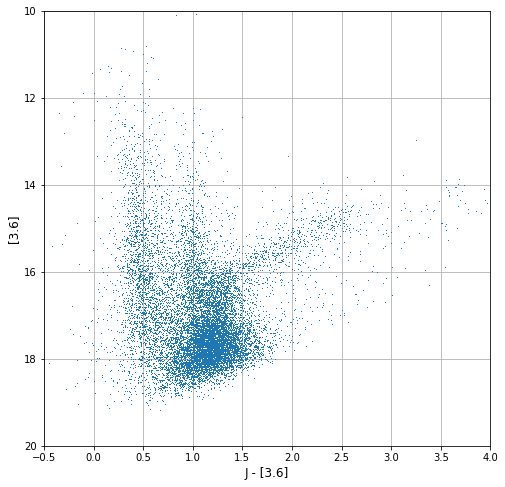

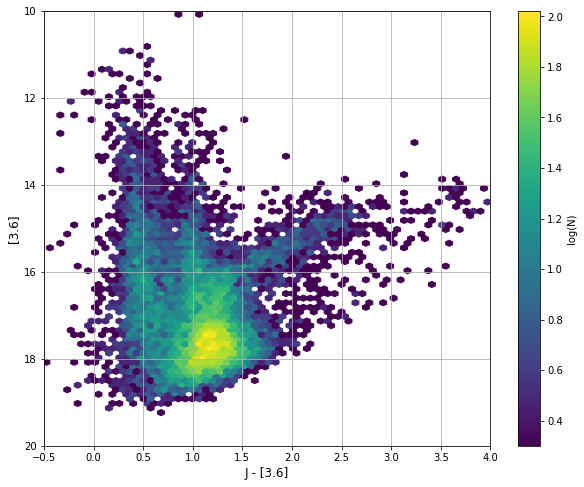

In [6]:
# 6

# [3.6] vs J-[3.6]
# CMD & Hess diagram
#
plt.figure(figsize=(8,8))
plt.plot(jMINUSthreesixDATA.jMINUSthreesix, jMINUSthreesixDATA.k36mag, ',')
#plt.xlim(-1.0, 6.0)
plt.xlim(-0.5, 4.0)
#plt.ylim(20.5, 8.5)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
plt.grid(True)
plt.show()
plt.close()
#plt.savefig('[3.6]_vs_J-[3.6]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
#plt.xlim(-1.0, 6.0)
plt.xlim(-0.5, 4.0)
#plt.ylim(20.5, 8.5)
plt.ylim(20.0, 10.0)
im1 = ax1.hexbin(jMINUSthreesixDATA.jMINUSthreesix, jMINUSthreesixDATA.k36mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.0, 6.0, 20.5, 8.5))
ax1.set_xlabel('J - [3.6]', size=12)
ax1.set_ylabel('[3.6]', size=12)
cb = plt.colorbar(im1, label='log(N)')
plt.grid(True)
plt.show()
plt.close()
#plt.savefig('[3.6]_vs_J-[3.6]_hist.pdf')

In [7]:
# 7

# The second thing I'll do is determine where the TRGB should be.
#
# With the Sibbons+ data I had a reference point, but with the Khan+ data
# I'm starting from scratch.
#
# To do so, I'll isolate only the photometric data of sources with
# errors in the magnitudes less than 0.1.

low_error_jMINUSthreesixDATA = jMINUSthreesixDATA[(jMINUSthreesixDATA.eJmag < 0.1) & (jMINUSthreesixDATA.e36mag < 0.1)]

# And as a check, see what the number of sources is for the entire catalog
# versus the number of sources in this trimmed catalog.

print len(jMINUSthreesixDATA)
print len(low_error_jMINUSthreesixDATA)

13743
8533


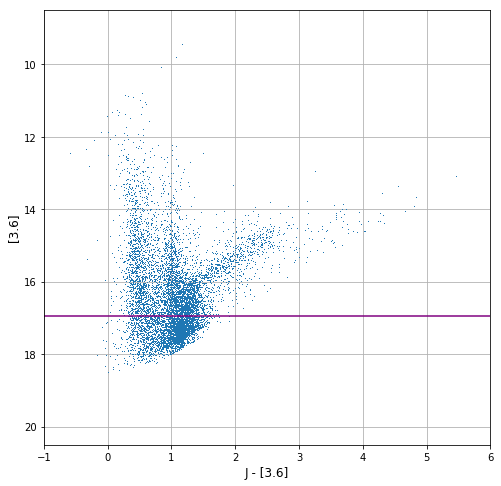

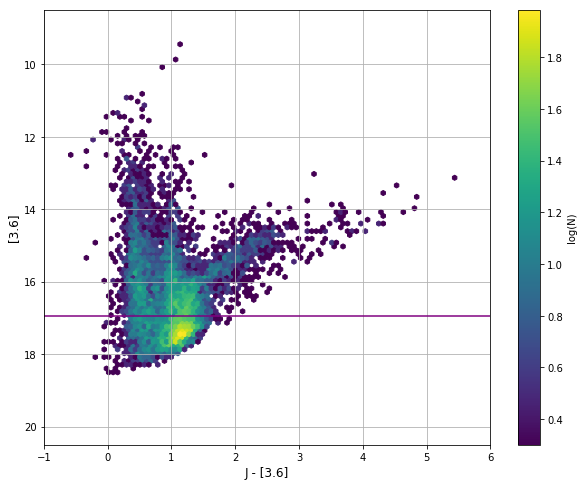

In [8]:
# 8

# With my catalog of only low-error photometry sources, I'll make a
# new CMD and Hess diagram just to see how the data look now.

# [3.6] vs J-[3.6] (low error)
# CMD & Hess diagram
#
plt.figure(figsize=(8,8))
plt.plot(low_error_jMINUSthreesixDATA.jMINUSthreesix, low_error_jMINUSthreesixDATA.k36mag, ',')
plt.xlim(-1.0, 6.0)
#plt.xlim(0.5, 1.75)
plt.ylim(20.5, 8.5)
#plt.ylim(19.5, 15.5)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#plt.savefig('[3.6]_vs_J-[3.6]_plot.pdf')
plt.axhline(y=16.941, linewidth=1.5, color='purple') # TRGB threshold
plt.grid(True)
plt.show()
plt.close()
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.0, 6.0)
plt.ylim(20.5, 8.5)
im1 = ax1.hexbin(low_error_jMINUSthreesixDATA.jMINUSthreesix, low_error_jMINUSthreesixDATA.k36mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.0, 6.0, 20.5, 8.5))
ax1.set_xlabel('J - [3.6]', size=12)
ax1.set_ylabel('[3.6]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[3.6]_vs_J-[3.6]_hist.pdf')
plt.axhline(y=16.941, linewidth=1.5, color='purple') # TRGB threshold
plt.grid(True)
plt.show()
plt.close()

In [9]:
# 9

# Definitely looks cleaner than before.
#
# I'll use this trimmed catalog to develop the color cuts themselves,
# but the full catalog when I'm doing the actual source identification.

4591
0.11594594594594554
156.58974358974413


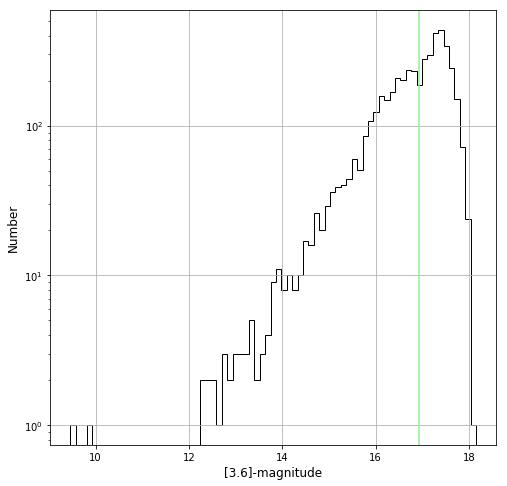

In [10]:
# 10

# In order to determine where the TRGB should be, I'll isolate the
# data between J-[3.6] = 0.9 and 1.5, where the majority of the relevant
# sources are, and make a vertical histogram of these points.
#
# Wherever there appears to be an inflection point in the KDE
# is where I'll say the boundary line should be.
#
# Here I'm making a list of sources in this restricted J-[3.6] range,
# plus a calculation of how many sources are included.

TRGB_hist = low_error_jMINUSthreesixDATA[(low_error_jMINUSthreesixDATA.jMINUSthreesix < 1.5)
                                 & (low_error_jMINUSthreesixDATA.jMINUSthreesix > 0.9)]

print len(TRGB_hist)

# Next I'll compute the optimum bin width using Knuth's Algorithm
# over which the histogram will plot the data, then print out this
# value and the number of bins that will be implemented.

binwidth = (stats.knuth_bin_width(TRGB_hist.k36mag))
bin_number = (max(TRGB_hist.k36mag)+binwidth)/binwidth

print binwidth
print bin_number

# Finally, here's the histogram of the relevant data:

fig = plt.figure(figsize = (8,8))
plt.hist(TRGB_hist.k36mag, bins=np.arange(min(TRGB_hist.k36mag), max(TRGB_hist.k36mag) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
#plt.xlim(16.0, 18.0)
#plt.ylim(100.0, 1000.0)
plt.xlabel('[3.6]-magnitude', size=12)
plt.ylabel('Number', size=12)
#plt.axvline(x=17.41, linewidth=1.5, color='orange') # Sibbons+ (2012) TRGB value
plt.axvline(x=16.941, linewidth=1.5, color='lightgreen') # TRGB value determined from KDE below
plt.grid(True)
plt.show()
plt.close()
#plt.savefig('[3.6]_vs_J-[3.6]_TRGB_histogram.pdf')

/Users/ahirschauer/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


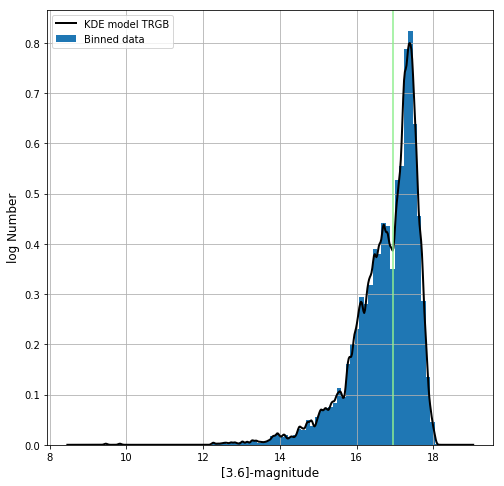

In [11]:
# 11

# The KDE analysis below will reveal the TRGB boundary.

kde_data_TRGB = TRGB_hist.k36mag.values
bins=np.arange(min(kde_data_TRGB ), max(kde_data_TRGB ) + binwidth, binwidth)
x_eval_TRGB = np.linspace(kde_data_TRGB.min() - 1.0, kde_data_TRGB.max() + 1.0, 500)
kde_TRGB = gaussian_kde(kde_data_TRGB,bw_method=binwidth/2.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval_TRGB, kde_TRGB(x_eval_TRGB),'k',lw=2,label='KDE model TRGB')
plt.hist(kde_data_TRGB,bins=bins,normed=True,label='Binned data')
#plt.xlim(16.935, 16.945)
#plt.ylim(0.385, 0.390)
plt.legend()
plt.xlabel('[3.6]-magnitude', size=12)
plt.ylabel('log Number', size=12)
#plt.axvline(x=17.41, linewidth=1.5, color='orange') # Sibbons+ (2012) TRGB value
plt.axvline(x=16.941, linewidth=1.5, color='lightgreen') # TRGB value determined from KDE below
plt.grid(True)
plt.show()
plt.close()
#plt.savefig('[3.6]_vs_J-[3.6]_KDE.pdf')

In [12]:
# 12

# Based on the KDE analysis
# (using optimum binwidths, then optimum bin widths divided by two
# in order to enhance clarity of location of the local minimum),
# my TRGB determination is at [3.6] = 16.941.
#
# This value is consistent even if I change the J-[3.6] values over
# which the histogram is binned, so I feel good about it.

In [13]:
# 13

# The third thing I'll do is start constructing the vertical bins
# over which the color-cut values will be estimated.
#
# I'll need to determine the optimum bin width, so I'll make another
# list of sources, with photometric errors less than 0.1
# and above the TRGB limit of [3.6] = 16.941.

color_cuts = low_error_jMINUSthreesixDATA[(low_error_jMINUSthreesixDATA.k36mag < 16.941)]

print len(jMINUSthreesixDATA)
print len(low_error_jMINUSthreesixDATA)
print len(TRGB_hist)
print len(color_cuts)

# The number of sources are printed here as well, in the following lists:
# (1) all data
# (2) all data with photometric errors less than 0.1
# (3) all data with photometric errors less than 0.1 and between J-[3.6] = 0.9 to 1.5
# (4) all data with photometric errors less than 0.1 and above [3.6] = 16.941

13743
8533
4591
5067


In [14]:
# 14

# Based on the list of sources determined from the above cell, the catalog
# "color_cuts" will be used to determine the optimum bin width for the
# successive vertical bins for J-[3.6] histograms of decreasing K-magnitude,
# starting at the TRGB limit at [3.6] = 16.941

color_cuts = color_cuts[(color_cuts.k36mag > 12.0)]

# I added the above cut of [3.6] data brighter than 12.0 because, without it,
# the optimum bin width was almost 0.4 dex (0.393)!
#
# That would have made the bins too coarse to get much detail out of the analysis.
#
# Instead, I've cut the data beyond where the data seems to get fairly sparse
# and, more than likely, too bright to actually be associated with NGC 6822
# in the first place.

binwidth = (stats.knuth_bin_width(color_cuts.k36mag))
bin_number = (max(color_cuts.k36mag)+binwidth)/binwidth

print binwidth
print bin_number

0.1385714285714279
123.24742268041297


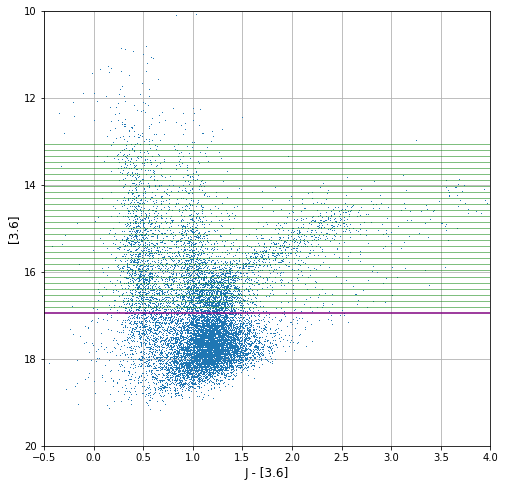

In [15]:
# 15

# I will now contruct bins of width = 0.139 dex from [3.6] = 16.941,
# building as many as I need to reach a limit of brightness which
# I am semi-arbitrarily setting at [3.6] = 13 (I'll need 29 bins).
#
# Also, I'll keep track of the number of sources in each bin
# so that if/when I need to double/triple/quadruple the bin sizes
# to recover the statistics, I can do so.
#
# Here is the J vs J-[3.6] CMD with the established boundary lines:

plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=16.941, linewidth=1.5, color='purple') # TRGB threshold
plt.axhline(y=16.802, linewidth=0.5, color='green') # Bin  1
plt.axhline(y=16.663, linewidth=0.5, color='green') # Bin  2
plt.axhline(y=16.524, linewidth=0.5, color='green') # Bin  3
plt.axhline(y=16.385, linewidth=0.5, color='green') # Bin  4
plt.axhline(y=16.246, linewidth=0.5, color='green') # Bin  5
plt.axhline(y=16.107, linewidth=0.5, color='green') # Bin  6
plt.axhline(y=15.968, linewidth=0.5, color='green') # Bin  7
plt.axhline(y=15.829, linewidth=0.5, color='green') # Bin  8
plt.axhline(y=15.690, linewidth=0.5, color='green') # Bin  9
plt.axhline(y=15.551, linewidth=0.5, color='green') # Bin 10
plt.axhline(y=15.412, linewidth=0.5, color='green') # Bin 11
plt.axhline(y=15.273, linewidth=0.5, color='green') # Bin 12
plt.axhline(y=15.134, linewidth=0.5, color='green') # Bin 13
plt.axhline(y=14.995, linewidth=0.5, color='green') # Bin 14
plt.axhline(y=14.856, linewidth=0.5, color='green') # Bin 15
plt.axhline(y=14.717, linewidth=0.5, color='green') # Bin 16
plt.axhline(y=14.578, linewidth=0.5, color='green') # Bin 17
#
plt.axhline(y=14.439, linewidth=0.5, color='green') # Bin 18 <- start double-wide bins
plt.axhline(y=14.300, linewidth=0.5, color='green') # Bin 19
plt.axhline(y=14.161, linewidth=0.5, color='green') # Bin 20
plt.axhline(y=14.022, linewidth=0.5, color='green') # Bin 21
plt.axhline(y=13.883, linewidth=0.5, color='green') # Bin 22
#
plt.axhline(y=13.744, linewidth=0.5, color='green') # Bin 23 <- start triple-wide bins
plt.axhline(y=13.605, linewidth=0.5, color='green') # Bin 24
plt.axhline(y=13.466, linewidth=0.5, color='green') # Bin 25
plt.axhline(y=13.327, linewidth=0.5, color='green') # Bin 26
plt.axhline(y=13.188, linewidth=0.5, color='green') # Bin 27
plt.axhline(y=13.049, linewidth=0.5, color='green') # Bin 28
#
plt.grid(True)
plt.show()
plt.close()
#plt.savefig('[3.6]_vs_J-[3.6]_bins.pdf')

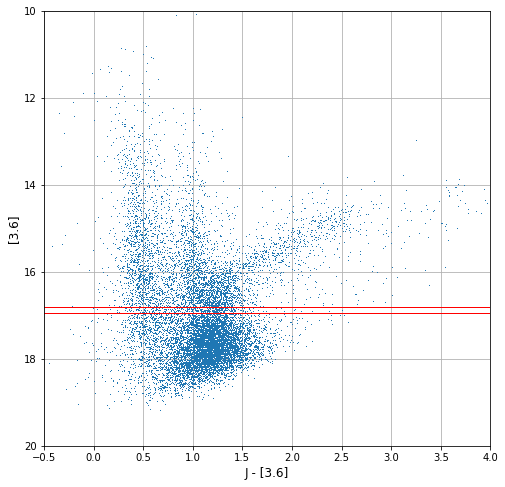

413
0.1161875


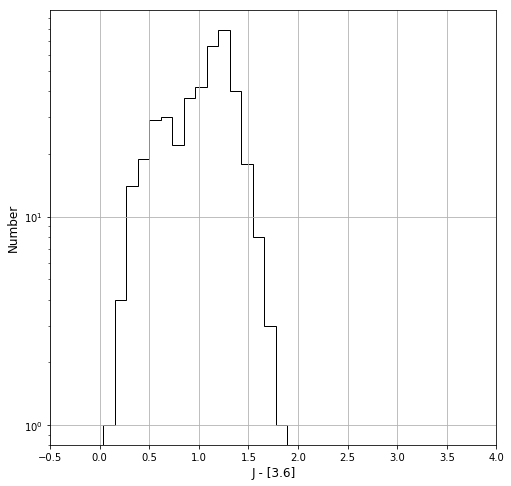

In [16]:
# 16

# Bin  1 ([3.6] = 16.941 to 16.802, center @ 16.8715)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=16.941, linewidth=1.0, color='red') # Bin 1 - lower boundary
plt.axhline(y=16.802, linewidth=1.0, color='red') # Bin 1 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 16.941) & (color_cuts.k36mag > 16.802)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

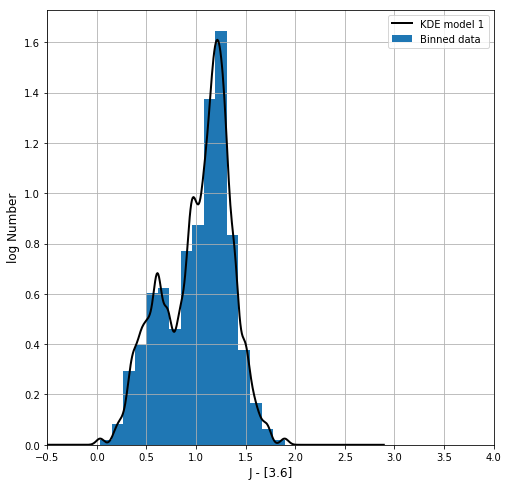

In [17]:
# 17

# Bin  1 ([3.6] = 16.941 to 16.802, center @ 16.8715)
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth, binwidth)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.0)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 1')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.773, 0.787)
#plt.ylim(0.44, 0.46)
#plt.xlim(1.816, 1.819)
#plt.ylim(0.005, 0.01)
#plt.xlim(1.453, 1.457)
#plt.ylim(0.36, 0.37)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  16.8715
### boundary 1: J-[3.6] = 0.782
### boundary 2: J-[3.6] = 
### boundary 3: J-[3.6] = *1.455*
### boundary 4: J-[3.6] = 1.818

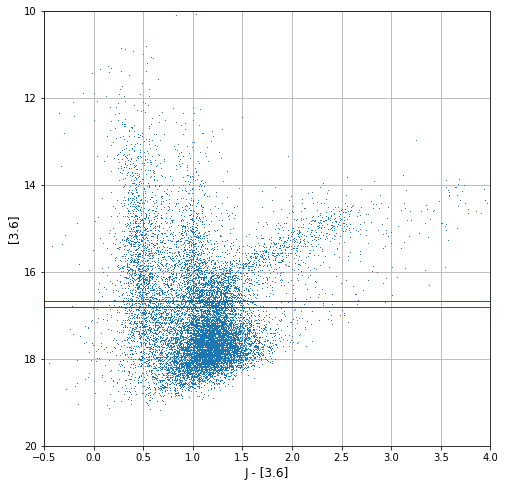

410
0.10905263157894739


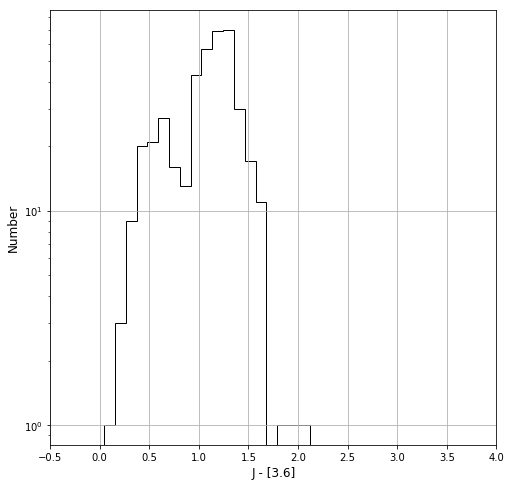

In [18]:
# 18

# Bin  2 ([3.6] = 16.802 to 16.663, center @ 16.7325)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=16.802, linewidth=1.0, color='red') # Bin 2 - lower boundary
plt.axhline(y=16.663, linewidth=1.0, color='red') # Bin 2 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 16.802) & (color_cuts.k36mag > 16.663)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

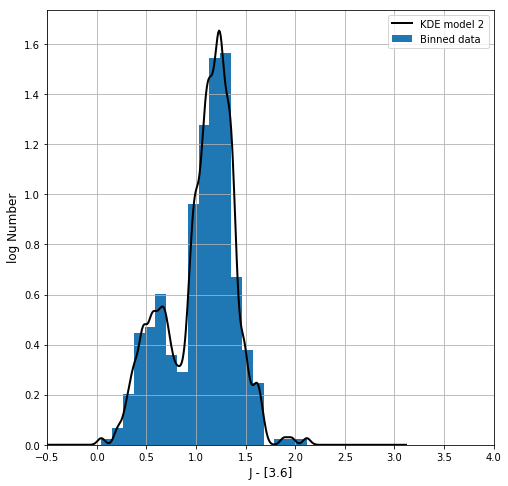

In [19]:
# 19

# Bin  2 ([3.6] = 16.802 to 16.663, center @ 16.7325)
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth, binwidth)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 2')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.82, 0.84)
#plt.ylim(0.31, 0.32)
#plt.xlim(1.78, 1.79)
#plt.ylim(0.0, 0.002)
#plt.xlim(1.56, 1.58)
#plt.ylim(0.235, 0.245)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  16.7325
### boundary 1: J-[3.6] = 0.832
### boundary 2: J-[3.6] = 
### boundary 3: J-[3.6] = *1.575*
### boundary 4: J-[3.6] = 1.787

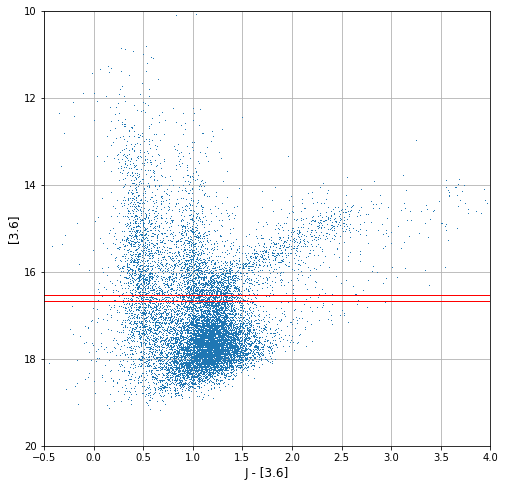

395
0.12823529411764706


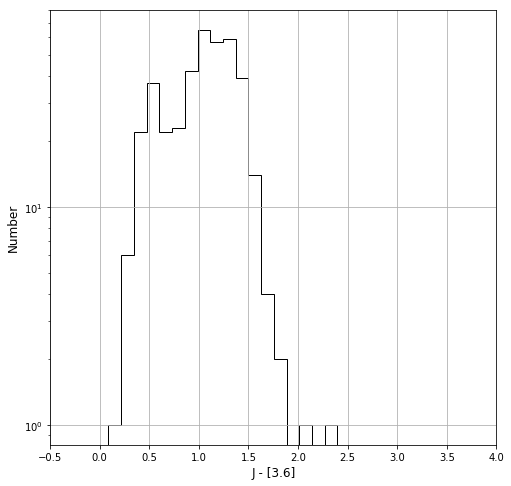

In [20]:
# 20

# Bin  3 ([3.6] = 16.663 to 16.524, center @ 16.5935)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=16.663, linewidth=1.0, color='red') # Bin 3 - lower boundary
plt.axhline(y=16.524, linewidth=1.0, color='red') # Bin 3 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 16.663) & (color_cuts.k36mag > 16.524)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

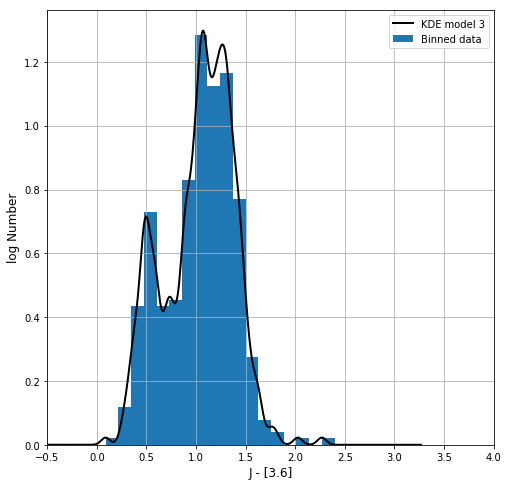

In [21]:
# 21

# Bin  3 ([3.6] = 16.663 to 16.524, center @ 16.5935)
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth, binwidth)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 3')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.786, 0.792)
#plt.ylim(0.44, 0.45)
#plt.xlim(1.155, 1.165)
#plt.ylim(1.14, 1.16)
#plt.xlim(1.915, 1.925)
#plt.ylim(0.002, 0.004)
#plt.xlim(1.59, 1.595)
#plt.ylim(0.205, 0.215)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  16.5935
### boundary 1: J-[3.6] = 0.789
### boundary 2: J-[3.6] = 1.158
### boundary 3: J-[3.6] = *1.594*
### boundary 4: J-[3.6] = 1.920

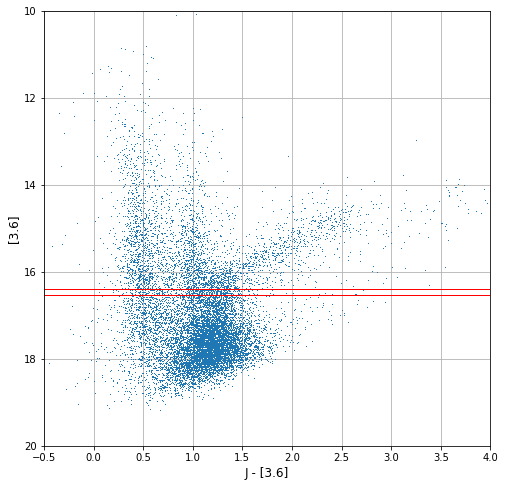

375
0.16107142857142856


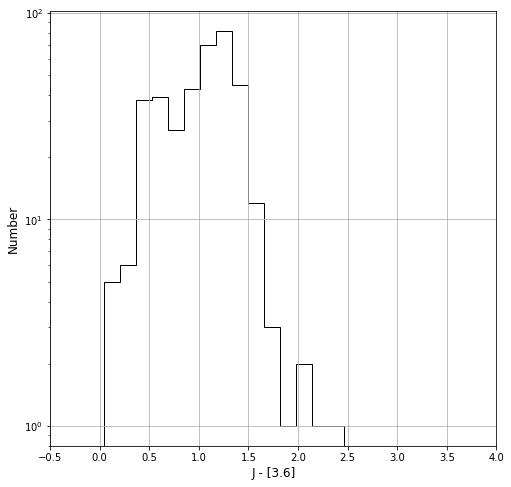

In [22]:
# 22

# Bin  4 ([3.6] = 16.524 to 16.385, center @ 16.4545)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=16.524, linewidth=1.0, color='red') # Bin 4 - lower boundary
plt.axhline(y=16.385, linewidth=1.0, color='red') # Bin 4 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 16.524) & (color_cuts.k36mag > 16.385)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

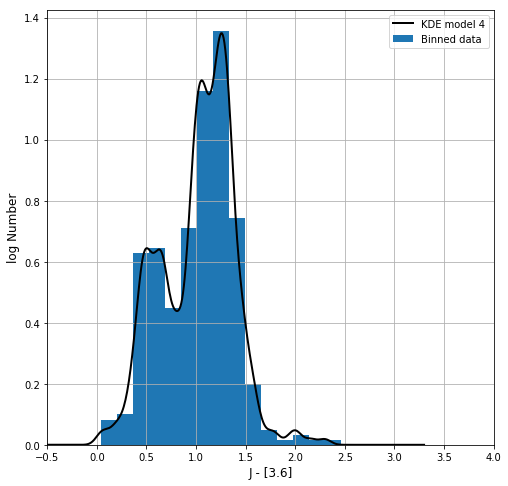

In [23]:
# 23

# Bin  4 ([3.6] = 16.524 to 16.385, center @ 16.4545)
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/1., binwidth/1.)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 4')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.805, 0.815)
#plt.ylim(0.435, 0.44)
#plt.xlim(1.13, 1.14)
#plt.ylim(1.14, 1.16)
#plt.xlim(1.88, 1.886)
#plt.ylim(0.023, 0.025)
#plt.xlim(1.40, 1.60)
#plt.ylim(0.20, 0.40)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  16.4545
### boundary 1: J-[3.6] = 0.809
### boundary 2: J-[3.6] = 1.133
### boundary 3: J-[3.6] = *1.525*
### boundary 4: J-[3.6] = 1.883

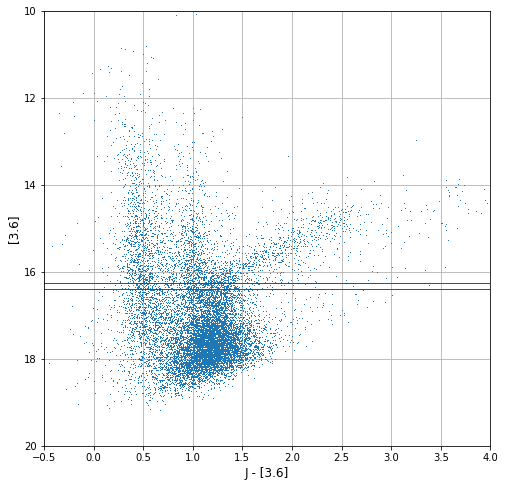

348
0.13533333333333336


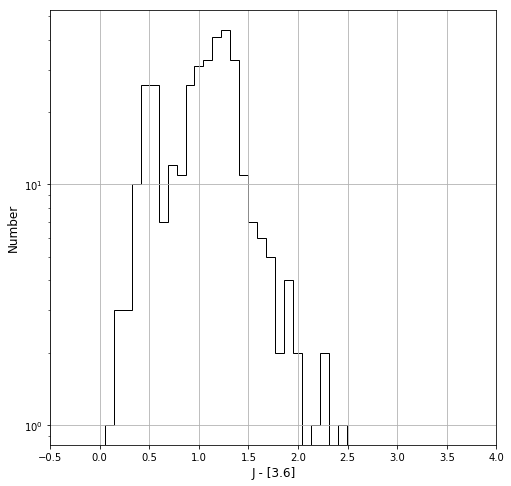

In [24]:
# 24

# Bin  5 ([3.6] = 16.385 to 16.246, center @ 16.3155)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=16.385, linewidth=1.0, color='red') # Bin 5 - lower boundary
plt.axhline(y=16.246, linewidth=1.0, color='red') # Bin 5 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 16.385) & (color_cuts.k36mag > 16.246)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/1.5, binwidth/1.5), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

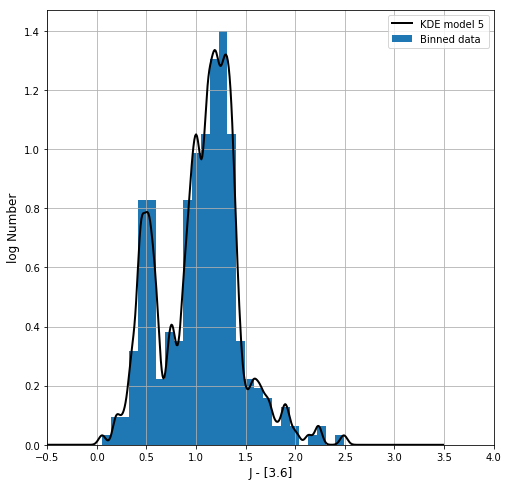

In [25]:
# 25

# Bin  5 ([3.6] = 16.385 to 16.246, center @ 16.3155)
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/1.5, binwidth/1.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 5')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.81, 0.82)
#plt.ylim(0.336, 0.338)
#plt.xlim(1.24, 1.26)
#plt.ylim(1.28, 1.285)
#plt.xlim(1.816, 1.822)
#plt.ylim(0.076, 0.08)
#plt.xlim(1.523, 1.527)
#plt.ylim(0.1875, 0.189)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  16.3155
### boundary 1: J-[3.6] = 0.814
### boundary 2: J-[3.6] = 1.250
### boundary 3: J-[3.6] = *1.525*
### boundary 4: J-[3.6] = 1.819

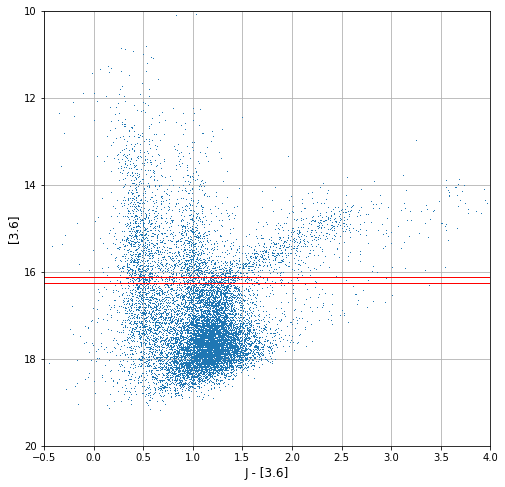

334
0.17707692307692308


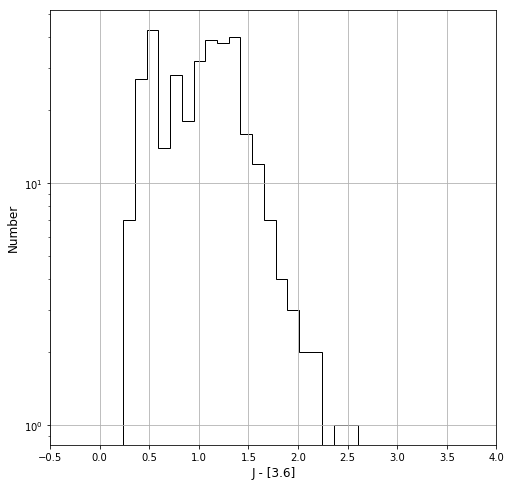

In [26]:
# 26

# Bin  6 ([3.6] = 16.246 to 16.107, center @ 16.1765)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=16.246, linewidth=1.0, color='red') # Bin 6 - lower boundary
plt.axhline(y=16.107, linewidth=1.0, color='red') # Bin 6 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 16.246) & (color_cuts.k36mag > 16.107)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/1.5, binwidth/1.5), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

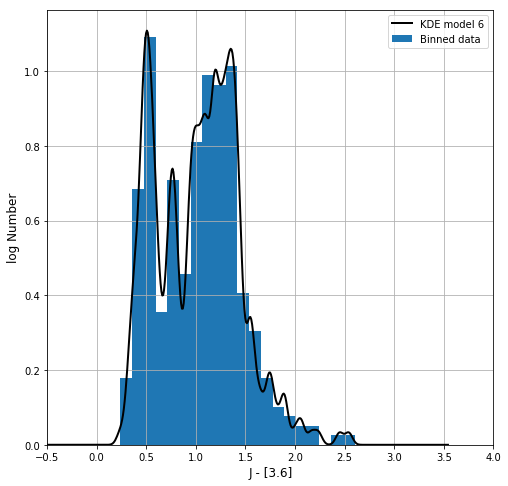

In [27]:
# 27

# Bin  6 ([3.6] = 16.246 to 16.107, center @ 16.1765)
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/1.5, binwidth/1.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/2.)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 6')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.855, 0.865)
#plt.ylim(0.44, 0.45)
#plt.xlim(1.235, 1.242)
#plt.ylim(0.98, 0.9805)
#plt.xlim(2.34, 2.345)
#plt.ylim(0.00475, 0.0051)
#plt.xlim(1.50, 1.52)
#plt.ylim(0.32, 0.33)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  16.1765
### boundary 1: J-[3.6] = 0.860
### boundary 2: J-[3.6] = 1.239
### boundary 3: J-[3.6] = *1.515*
### boundary 4: J-[3.6] = 2.343

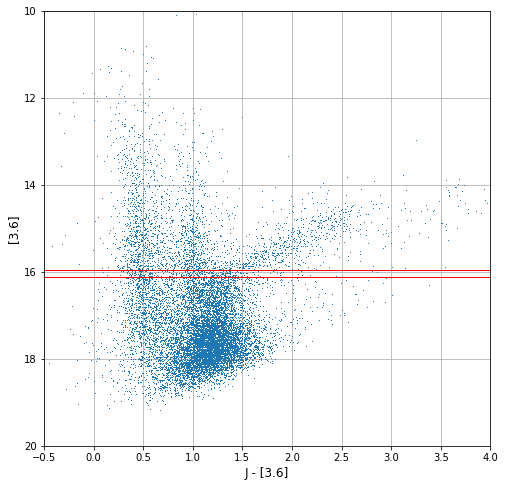

281
0.18574999999999997


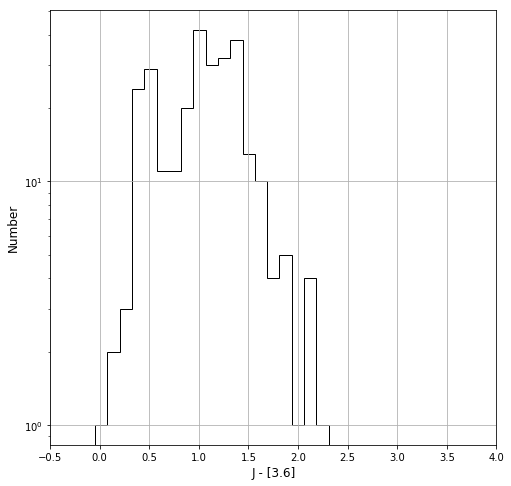

In [28]:
# 28

# Bin  7 ([3.6] = 16.107 to 15.968, center @ 16.0375)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=16.107, linewidth=1.0, color='red') # Bin 7 - lower boundary
plt.axhline(y=15.968, linewidth=1.0, color='red') # Bin 7 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 16.107) & (color_cuts.k36mag > 15.968)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/1.5, binwidth/1.5), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

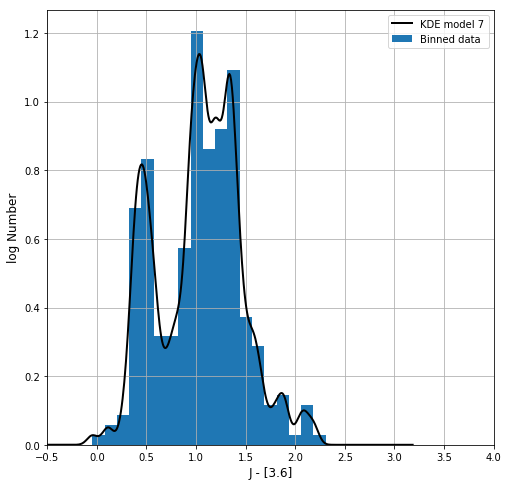

In [29]:
# 29

# Bin  7 ([3.6] = 16.107 to 15.968, center @ 16.0375)
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/1.5, binwidth/1.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 7')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.825, 0.835)
#plt.ylim(0.40, 0.42)
#plt.xlim(1.23, 1.25)
#plt.ylim(0.94, 0.955)
#plt.xlim(1.985, 1.995)
#plt.ylim(0.055, 0.062)
#plt.xlim(1.52, 1.53)
#plt.ylim(0.331, 0.333)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  16.0375
### boundary 1: J-[3.6] = 0.828 (0.692)
### boundary 2: J-[3.6] = 1.243
### boundary 3: J-[3.6] = *1.523*
### boundary 4: J-[3.6] = 1.989

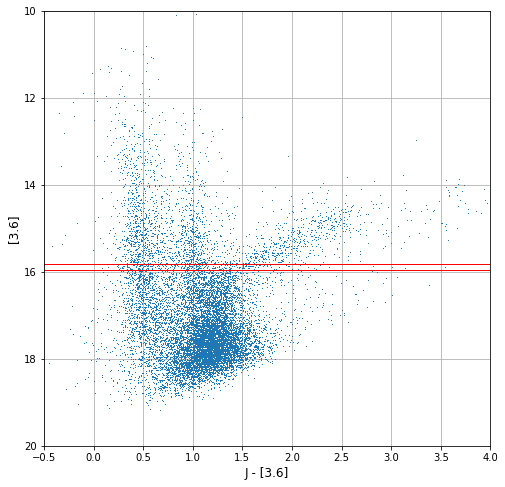

299
0.19442857142857142


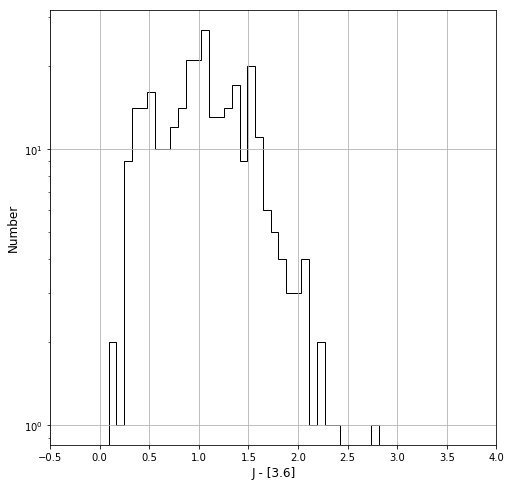

In [30]:
# 30

# Bin  8 ([3.6] = 15.968 to 15.829, center @ 15.8985)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=15.968, linewidth=1.0, color='red') # Bin 8 - lower boundary
plt.axhline(y=15.829, linewidth=1.0, color='red') # Bin 8 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 15.968) & (color_cuts.k36mag > 15.829)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/2.5, binwidth/2.5), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

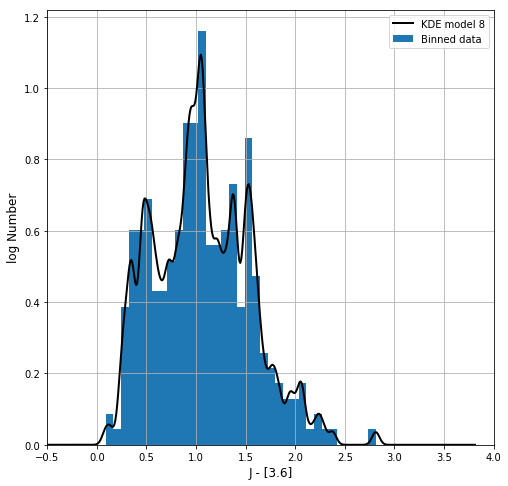

In [31]:
# 31

# Bin  8 ([3.6] = 15.968 to 15.829, center @ 15.8985)
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/2.5, binwidth/2.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/2.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 8')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.75, 0.78)
#plt.ylim(0.51, 0.52)
#plt.xlim(1.27, 1.28)
#plt.ylim(0.535, 0.54)
#plt.xlim(1.444, 1.45)
#plt.ylim(0.505, 0.515)
#plt.xlim(2.15, 2.16)
#plt.ylim(0.056, 0.060)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  15.8985
### boundary 1: J-[3.6] = 0.765
### boundary 2: J-[3.6] = 1.276
### boundary 3: J-[3.6] = 1.446
### boundary 4: J-[3.6] = 2.156

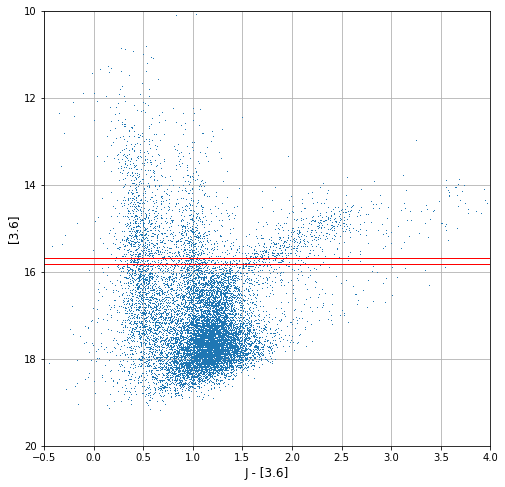

226
0.2477


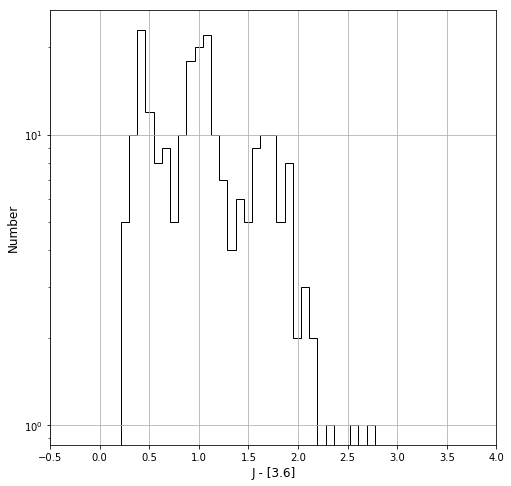

In [32]:
# 32

# Bin  9 ([3.6] = 15.829 to 15.690, center @ 15.7595)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=15.829, linewidth=1.0, color='red') # Bin 9 - lower boundary
plt.axhline(y=15.690, linewidth=1.0, color='red') # Bin 9 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 15.829) & (color_cuts.k36mag > 15.690)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/3., binwidth/3.), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

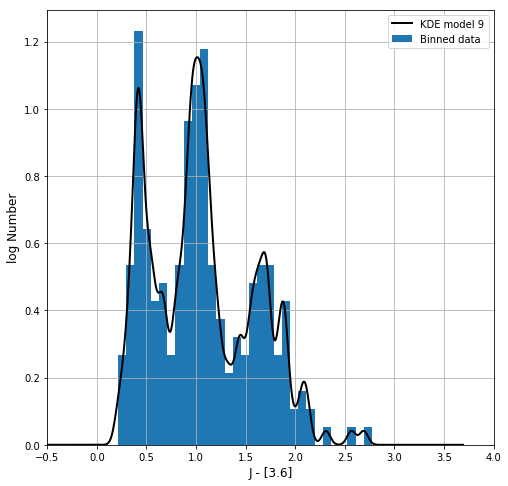

In [33]:
# 33

# Bin  9 ([3.6] = 15.829 to 15.690, center @ 15.7595)
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/3., binwidth/3.)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/3.)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 9')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.735, 0.742)
#plt.ylim(0.335, 0.336)
#plt.xlim(1.3475, 1.35)
#plt.ylim(0.2375, 0.24)
#plt.xlim(1.48, 1.49)
#plt.ylim(0.315, 0.32)
#plt.xlim(2.225, 2.23)
#plt.ylim(0.01, 0.0125)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  15.7595
### boundary 1: J-[3.6] = 0.739
### boundary 2: J-[3.6] = 1.349
### boundary 3: J-[3.6] = 1.484
### boundary 4: J-[3.6] = 2.228

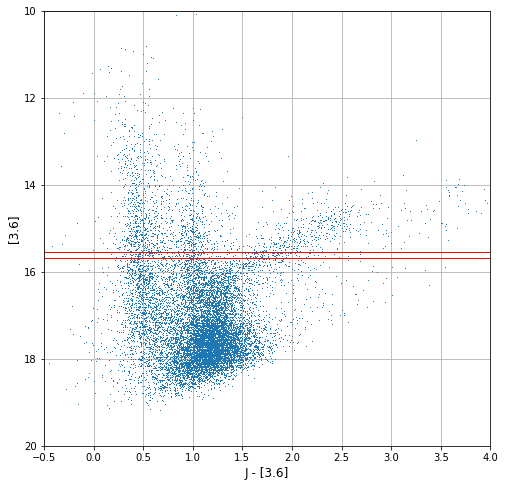

218
0.3135


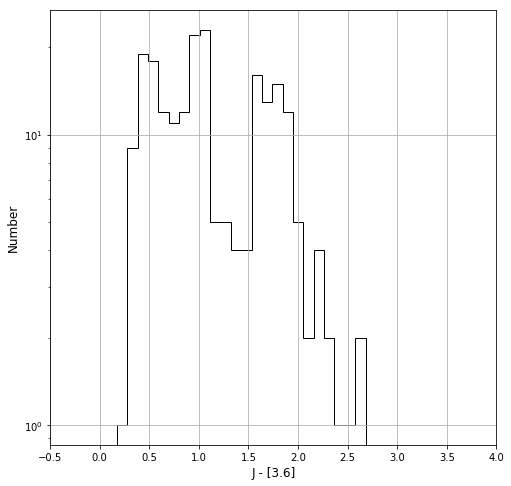

In [34]:
# 34

# Bin 10 ([3.6] = 15.690 to 15.551, center @ 15.6205)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=15.690, linewidth=1.0, color='red') # Bin 10 - lower boundary
plt.axhline(y=15.551, linewidth=1.0, color='red') # Bin 10 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 15.690) & (color_cuts.k36mag > 15.551)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/3., binwidth/3.), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

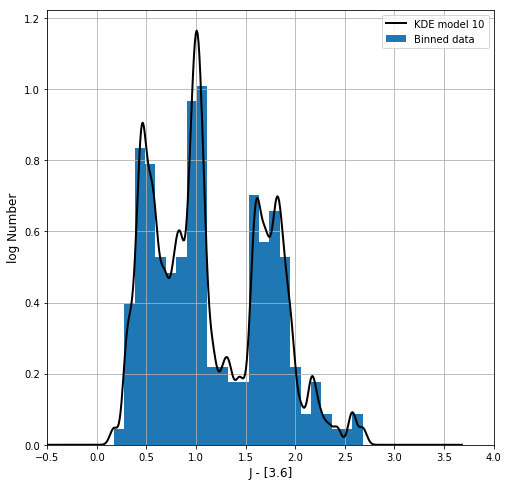

In [35]:
# 35

# Bin 10 ([3.6] = 15.690 to 15.551, center @ 15.6205)
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/3., binwidth/3.)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/4.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 10')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.705, 0.720)
#plt.ylim(0.496, 0.498)
#plt.xlim(1.265, 1.275)
#plt.ylim(0.227, 0.229)
#plt.xlim(1.412, 1.415)
#plt.ylim(0.194, 0.195)
#plt.xlim(1.725, 1.735)
#plt.ylim(0.613, 0.616)
#plt.xlim(2.4675, 2.4725)
#plt.ylim(0.03875, 0.039)
#plt.xlim(1.474, 1.48)
#plt.ylim(0.186, 0.188)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  15.6205
### boundary 1: J-[3.6] = 0.709
### boundary 2: J-[3.6] = 1.269
### boundary 3: J-[3.6] = 1.413 (*1.730*?) *1.477*
### boundary 4: J-[3.6] = 2.470

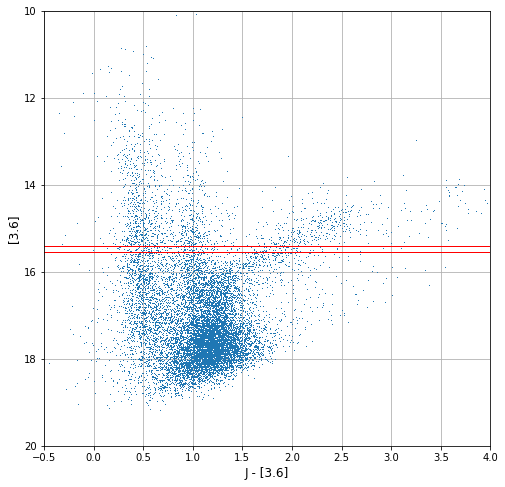

202
0.370625


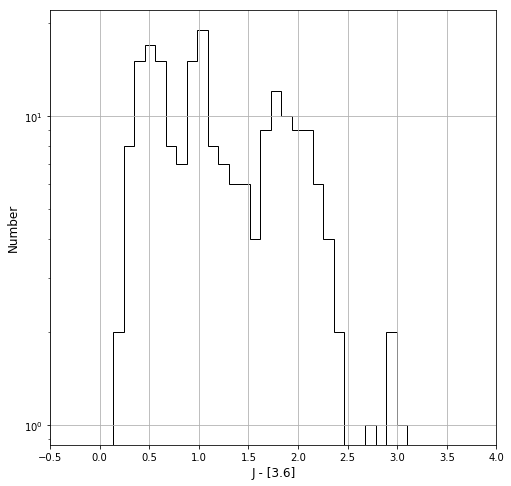

In [36]:
# 36

# Bin 11 ([3.6] = 15.551 to 15.412, center @ 15.4815)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=15.551, linewidth=1.0, color='red') # Bin 11 - lower boundary
plt.axhline(y=15.412, linewidth=1.0, color='red') # Bin 11 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 15.551) & (color_cuts.k36mag > 15.412)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/3.5, binwidth/3.5), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

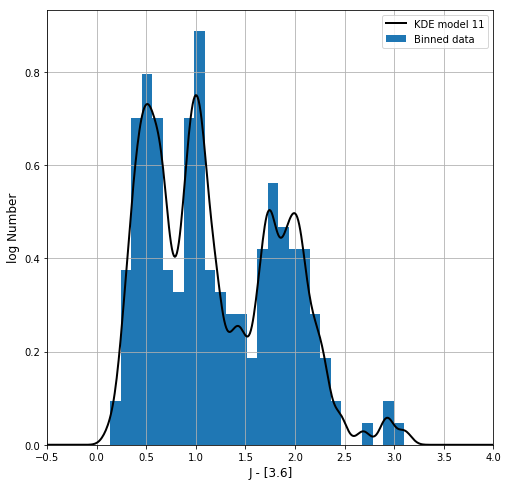

In [37]:
# 37

# Bin 11 ([3.6] = 15.551 to 15.412, center @ 15.4815)
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/3.5, binwidth/3.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/3.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 11')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.785, 0.791)
#plt.ylim(0.4, 0.405)
#plt.xlim(1.33, 1.34)
#plt.ylim(0.24, 0.25)
#plt.xlim(1.51, 1.53)
#plt.ylim(0.23, 0.235)
#plt.xlim(2.585, 2.59)
#plt.ylim(0.018, 0.020)
#plt.xlim(1.85, 1.855)
#plt.ylim(0.443, 0.445)
#plt.xlim(1.51, 1.53)
#plt.ylim(0.23, 0.24)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  15.4815
### boundary 1: J-[3.6] = 0.789
### boundary 2: J-[3.6] = 1.336
### boundary 3: J-[3.6] = 1.515 *1.853* *1.515*
### boundary 4: J-[3.6] = 2.590

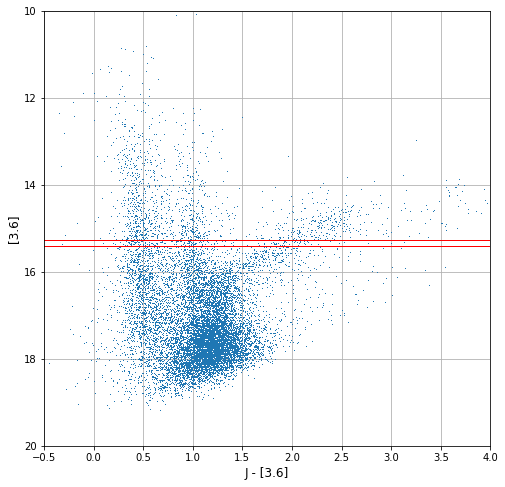

196
0.3454


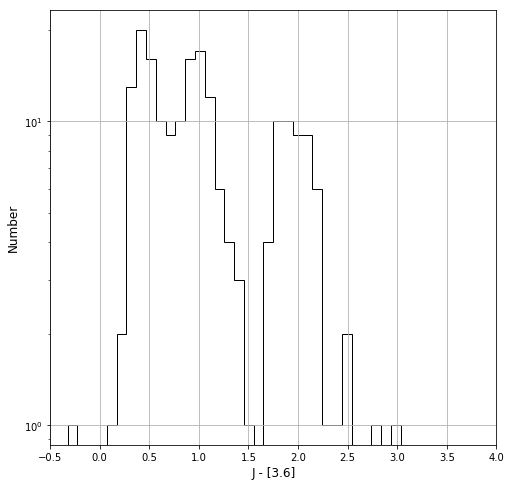

In [38]:
# 38

# Bin 12 ([3.6] = 15.412 to 15.273, center @ 15.3425)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=15.412, linewidth=1.0, color='red') # Bin 12 - lower boundary
plt.axhline(y=15.273, linewidth=1.0, color='red') # Bin 12 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 15.412) & (color_cuts.k36mag > 15.273)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/3.5, binwidth/3.5), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

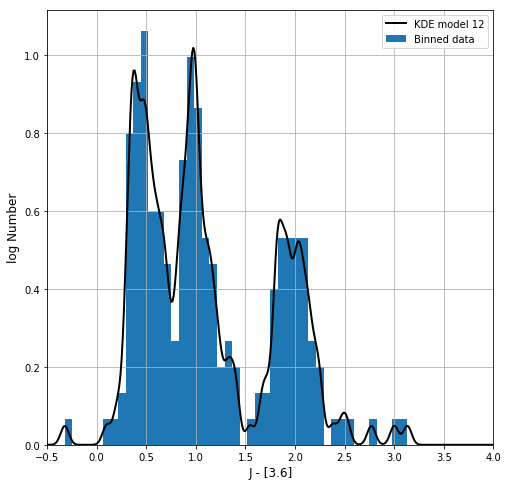

In [39]:
# 39

# Bin 12 ([3.6] = 15.412 to 15.273, center @ 15.3425)
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/4.5, binwidth/4.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/5.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 12')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.753, 0.756)
#plt.ylim(0.401, 0.402)
#plt.xlim(1.285, 1.295)
#plt.ylim(0.22, 0.24)
#plt.xlim(1.5075, 1.51)
#plt.ylim(0.0435, 0.045)
#plt.xlim(2.644, 2.646)
#plt.ylim(0.0044, 0.0046)
#plt.xlim(1.975, 1.985)
#plt.ylim(0.494, 0.496)
#plt.xlim(1.583, 1.587)
#plt.ylim(0.046, 0.048)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  15.3425
### boundary 1: J-[3.6] = 0.754
### boundary 2: J-[3.6] = 1.290
### boundary 3: J-[3.6] = 1.509 *1.979* *1.585*
### boundary 4: J-[3.6] = 2.646

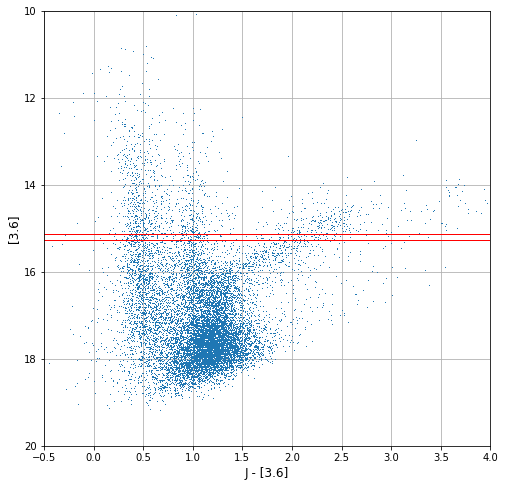

182
0.413


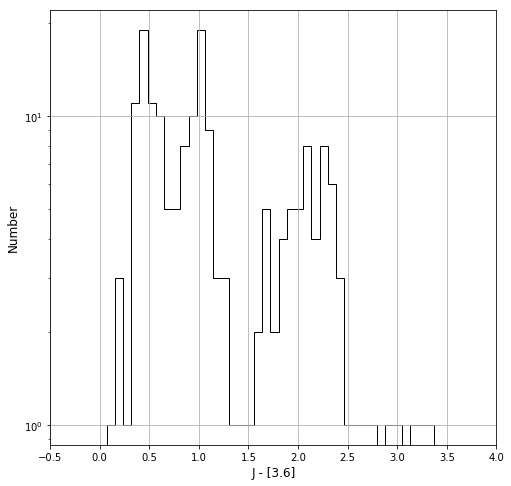

In [40]:
# 40

# Bin 13 ([3.6] = 15.273 to 15.134, center @ 15.2035)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=15.273, linewidth=1.0, color='red') # Bin 13 - lower boundary
plt.axhline(y=15.134, linewidth=1.0, color='red') # Bin 13 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 15.273) & (color_cuts.k36mag > 15.134)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/5., binwidth/5.), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

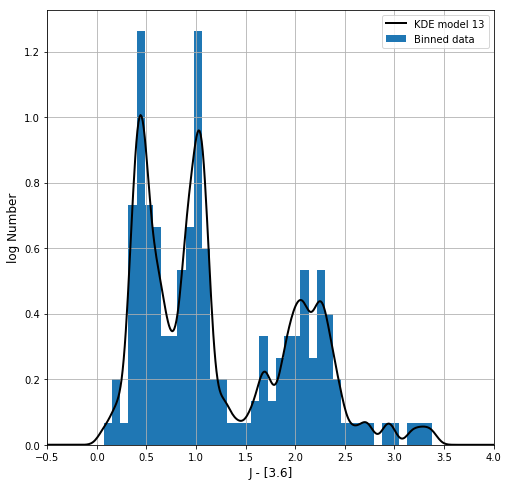

In [41]:
# 41

# Bin 13 ([3.6] = 15.273 to 15.134, center @ 15.2035)
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/5., binwidth/5.)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/5.)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 13')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.75, 0.78)
#plt.ylim(0.34, 0.36)
#plt.xlim(1.2375, 1.24)
#plt.ylim(0.165, 0.17)
#plt.xlim(1.45, 1.4525)
#plt.ylim(0.072, 0.074)
#plt.xlim(2.832, 2.834)
#plt.ylim(0.033, 0.0335)
#plt.xlim(2.155, 2.165)
#plt.ylim(0.405, 0.406)
#plt.xlim(1.785, 1.795)
#plt.ylim(0.182, 0.184)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  15.2035
### boundary 1: J-[3.6] = 0.760
### boundary 2: J-[3.6] = 1.238
### boundary 3: J-[3.6] = 1.451 *2.163* *1.792*
### boundary 4: J-[3.6] = 2.833

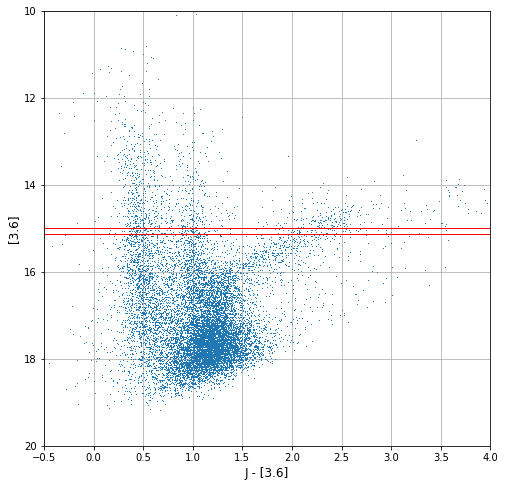

167
0.43787499999999996


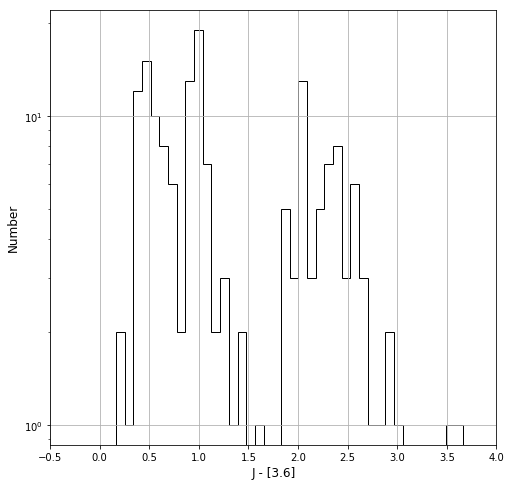

In [42]:
# 42

# Bin 14 ([3.6] = 15.134 to 14.995, center @ 15.0645)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=15.134, linewidth=1.0, color='red') # Bin 14 - lower boundary
plt.axhline(y=14.995, linewidth=1.0, color='red') # Bin 14 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 15.134) & (color_cuts.k36mag > 14.995)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/5., binwidth/5.), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

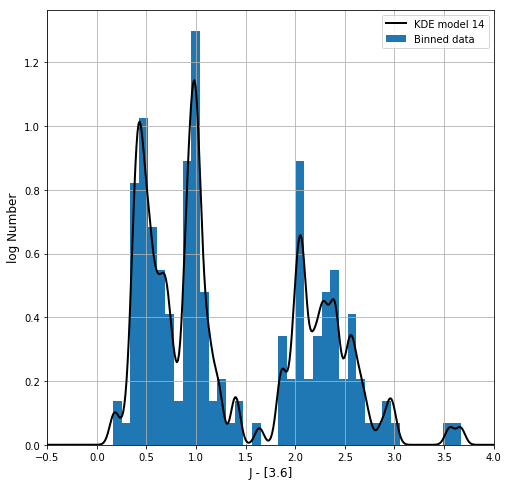

In [43]:
# 43

# Bin 14 ([3.6] = 15.134 to 14.995, center @ 15.0645)
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/5., binwidth/5.)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/8.)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 14')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.78, 0.79)
#plt.ylim(0.37, 0.38)
#plt.xlim(1.32, 1.34)
#plt.ylim(0.105, 0.115)
#plt.xlim(1.555, 1.560)
#plt.ylim(0.025, 0.03)
#plt.xlim(2.824, 2.826)
#plt.ylim(0.073, 0.074)
#plt.xlim(1.90, 1.93)
#plt.ylim(0.225, 0.235)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  15.0645
### boundary 1: J-[3.6] = 0.785
### boundary 2: J-[3.6] = 1.325
### boundary 3: J-[3.6] = 1.557 *1.910*
### boundary 4: J-[3.6] = 2.825

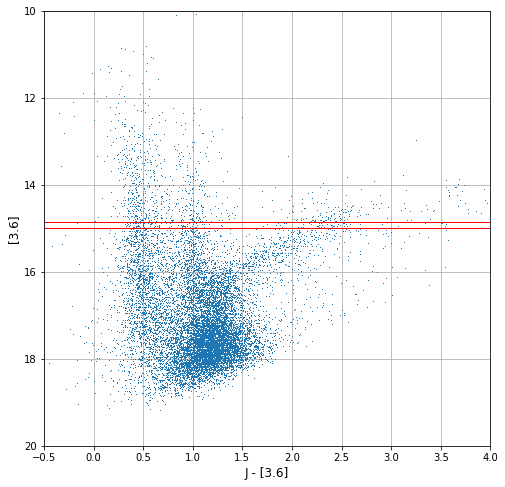

152
0.5322857142857143


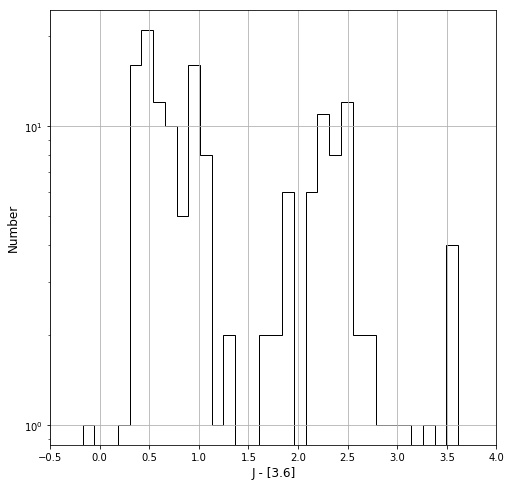

In [44]:
# 44

# Bin 15 ([3.6] = 14.995 to 14.856, center @ 14.9255)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=14.995, linewidth=1.0, color='red') # Bin 15 - lower boundary
plt.axhline(y=14.856, linewidth=1.0, color='red') # Bin 15 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 14.995) & (color_cuts.k36mag > 14.856)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/4.5, binwidth/4.5), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

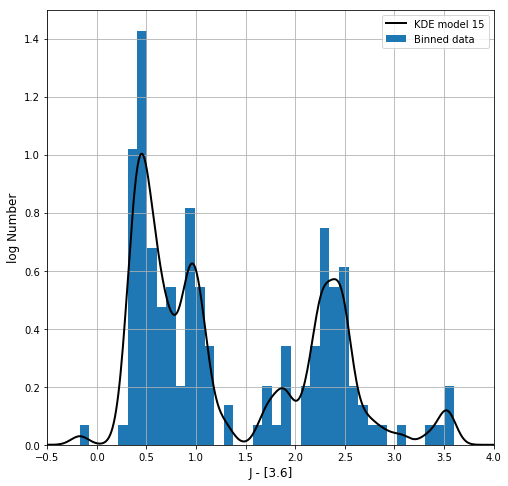

In [45]:
# 45

# Bin 15 ([3.6] = 14.995 to 14.856, center @ 14.9255)
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/5.5, binwidth/5.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/5.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 15')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.77, 0.79)
#plt.ylim(0.44, 0.46)
#plt.xlim(1.22, 1.23)
#plt.ylim(0.125, 0.135)
#plt.xlim(1.475, 1.485)
#plt.ylim(0.011, 0.012)
#plt.xlim(2.638, 2.639)
#plt.ylim(0.182, 0.184)
#plt.xlim(2.005, 2.01)
#plt.ylim(0.1515, 0.152)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  14.9255
### boundary 1: J-[3.6] = 0.780
### boundary 2: J-[3.6] = 1.227
### boundary 3: J-[3.6] = 1.480 *2.008*
### boundary 4: J-[3.6] = 2.639

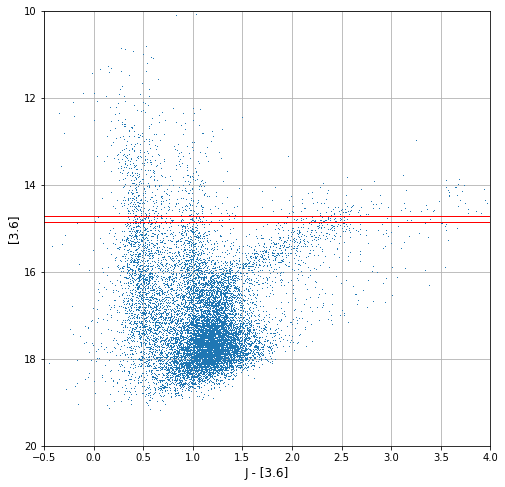

136
0.4787142857142857


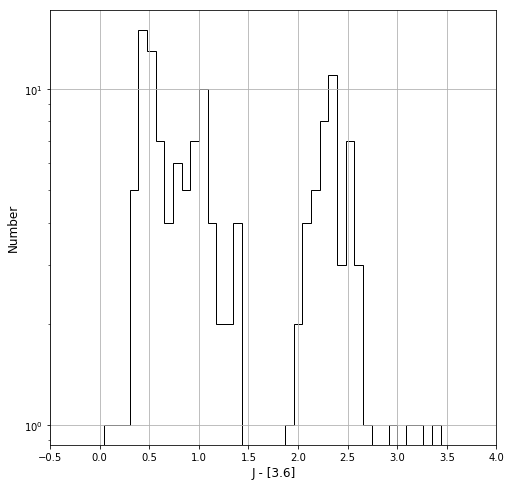

In [46]:
# 46

# Bin 16 ([3.6] = 14.856 to 14.717, center @ 14.7865)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=14.856, linewidth=1.0, color='red') # Bin 16 - lower boundary
plt.axhline(y=14.717, linewidth=1.0, color='red') # Bin 16 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 14.856) & (color_cuts.k36mag > 14.717)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/5.5, binwidth/5.5), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

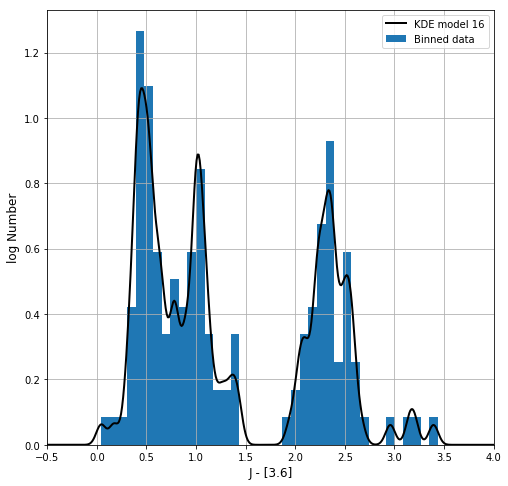

In [47]:
# 47

# Bin 16 ([3.6] = 14.856 to 14.717, center @ 14.7865)
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/5.5, binwidth/5.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/8.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 16')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.81, 0.82)
#plt.ylim(0.408, 0.410)
#plt.xlim(1.272, 1.275)
#plt.ylim(0.204, 0.206)
#plt.xlim(1.69, 1.695)
#plt.ylim(0.0002, 0.0003)
#plt.xlim(2.815, 2.82)
#plt.ylim(0.011, 0.012)
#plt.xlim(2.119, 2.122)
#plt.ylim(0.325, 0.33)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  14.7865
### boundary 1: J-[3.6] = 0.812
### boundary 2: J-[3.6] = 1.273
### boundary 3: J-[3.6] = 1.692 *2.121*
### boundary 4: J-[3.6] = 2.818
### boundary 5: J-[3.6] = 

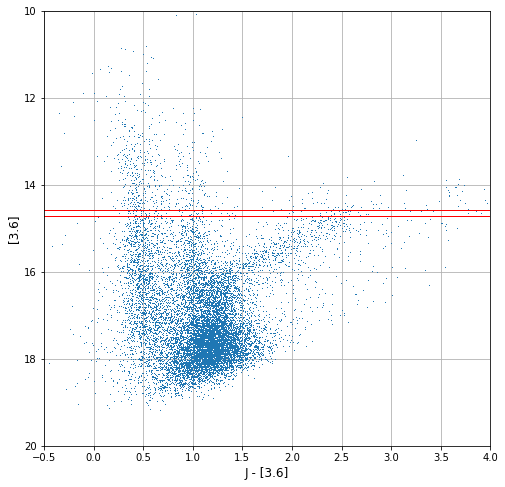

110
0.6295000000000001


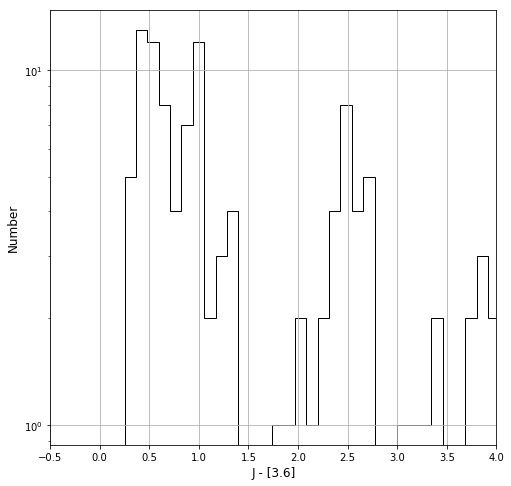

In [48]:
# 48

# Bin 17 ([3.6] = 14.717 to 14.578, center @ 14.6475)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=14.717, linewidth=1.0, color='red') # Bin 17 - lower boundary
plt.axhline(y=14.578, linewidth=1.0, color='red') # Bin 17 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 14.717) & (color_cuts.k36mag > 14.578)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/5.5, binwidth/5.5), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

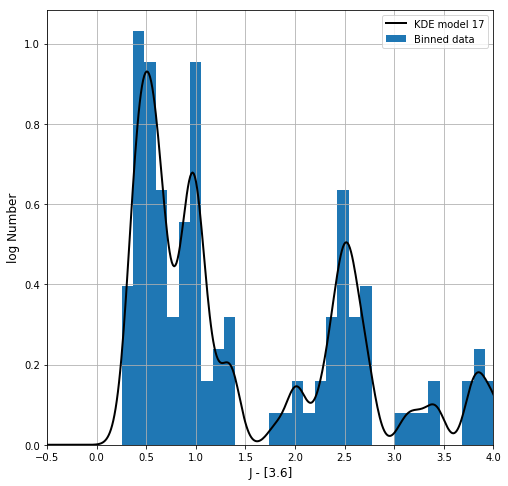

In [49]:
# 49

# Bin 17 ([3.6] = 14.717 to 14.578, center @ 14.6475)
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/5.5, binwidth/5.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/7.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 17')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.78, 0.7825)
#plt.ylim(0.444, 0.446)
#plt.xlim(1.265, 1.27)
#plt.ylim(0.203, 0.205)
#plt.xlim(1.613, 1.617)
#plt.ylim(0.0087, 0.009)
#plt.xlim(2.95, 2.96)
#plt.ylim(0.022, 0.023)
#plt.xlim(2.15, 2.166)
#plt.ylim(0.104, 0.106)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  14.6475
### boundary 1: J-[3.6] = 0.781
### boundary 2: J-[3.6] = 1.267
### boundary 3: J-[3.6] = 1.615 *2.159*
### boundary 4: J-[3.6] = 2.958

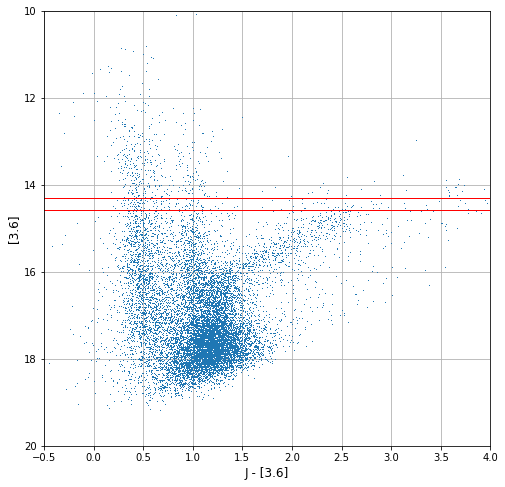

161
0.5311250000000001


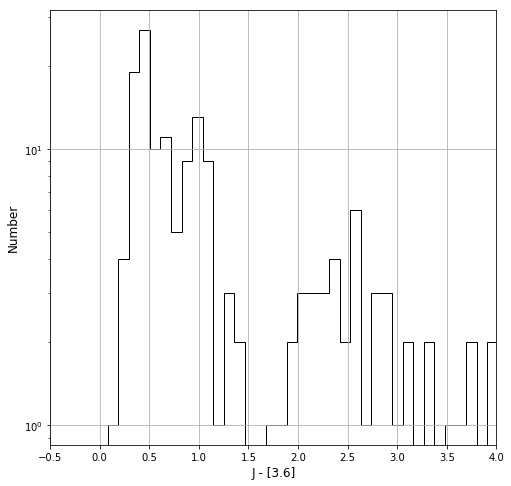

In [50]:
# 50

# Bin 18 ([3.6] = 14.578 to 14.300, center @ 14.439) <- double-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=14.578, linewidth=1.0, color='red') # Bin 18 - lower boundary
plt.axhline(y=14.300, linewidth=1.0, color='red') # Bin 18 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 14.578) & (color_cuts.k36mag > 14.300)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/5., binwidth/5.), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

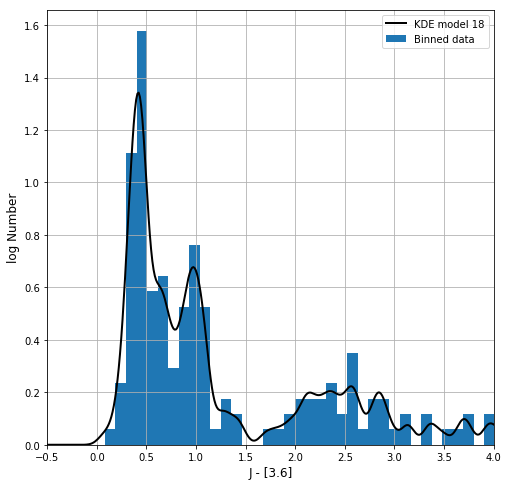

In [51]:
# 51

# Bin 18 ([3.6] = 14.578 to 14.300, center @ 14.439) <- double-wide bin
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/5., binwidth/5.)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/8.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 18')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.78, 0.79)
#plt.ylim(0.45, 0.46)
#plt.xlim(1.210, 1.212)
#plt.ylim(0.1575, 0.16)
#plt.xlim(1.585, 1.59)
#plt.ylim(0.02, 0.022)
#plt.xlim(3.245, 3.255)
#plt.ylim(0.045, 0.046)
#plt.xlim(2.235, 2.240)
#plt.ylim(0.189, 0.1895)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  14.439
### boundary 1: J-[3.6] = 0.785
### boundary 2: J-[3.6] = 1.211
### boundary 3: J-[3.6] = 1.587 *2.238*
### boundary 4: J-[3.6] = 3.252

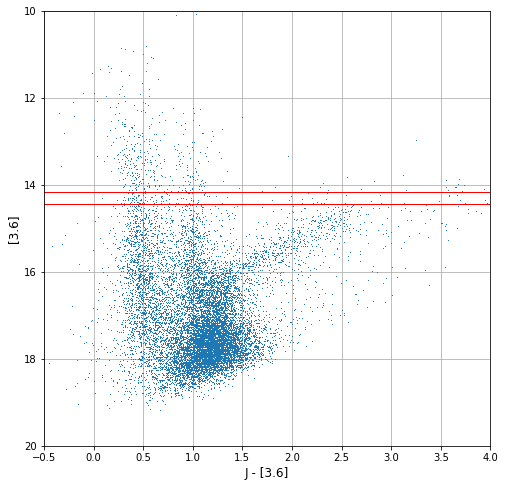

106
0.2338333333333333


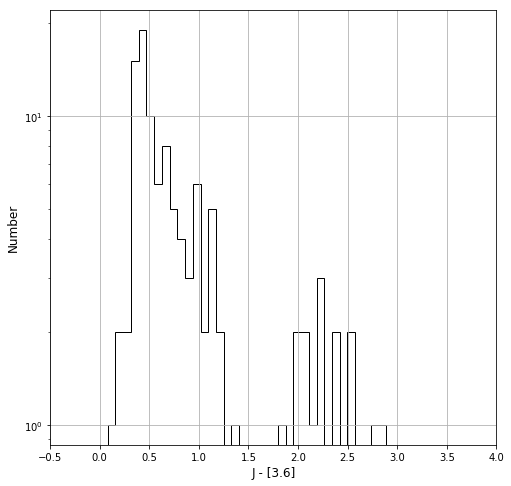

In [52]:
# 52

# Bin 19 ([3.6] = 14.439 to 14.161, center @ 14.300) <- double-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=14.439, linewidth=1.0, color='red') # Bin 19 - lower boundary
plt.axhline(y=14.161, linewidth=1.0, color='red') # Bin 19 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 14.439) & (color_cuts.k36mag > 14.161) & (color_cuts.jMINUSthreesix < 3.0)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/3., binwidth/3.), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

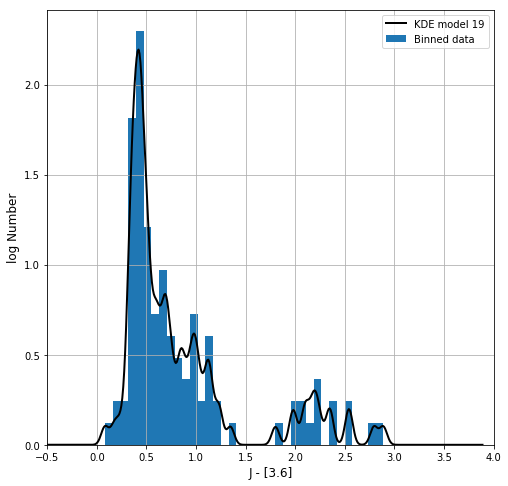

In [53]:
# 53

# Bin 19 ([3.6] = 14.439 to 14.161, center @ 14.300) <- double-wide bin
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/3., binwidth/3.)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/4.)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 19')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.814, 0.816)
#plt.ylim(0.498, 0.5)
#plt.xlim(1.3065, 1.3075)
#plt.ylim(0.106, 0.108)
#plt.xlim(1.57, 1.58)
#plt.ylim(0.0, 0.00002)
#plt.xlim(3.26, 3.3)
#plt.ylim(0.0, 0.0000000000001)
#plt.xlim(2.285, 2.292)
#plt.ylim(0.13, 0.14)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  14.300
### boundary 1: J-[3.6] = 0.816
### boundary 2: J-[3.6] = 1.307
### boundary 3: J-[3.6] = 1.576 *2.289*
### boundary 4: J-[3.6] = 3.281*

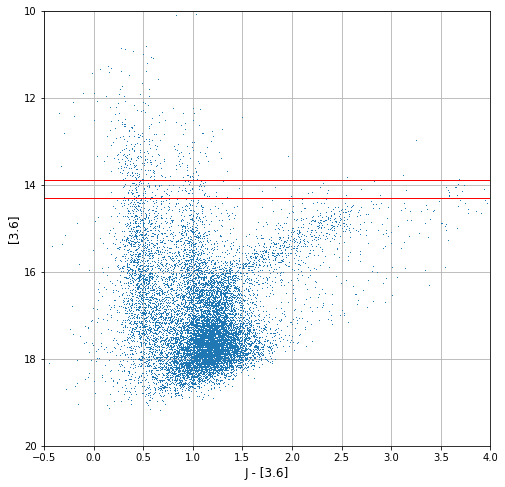

142
0.2568888888888889


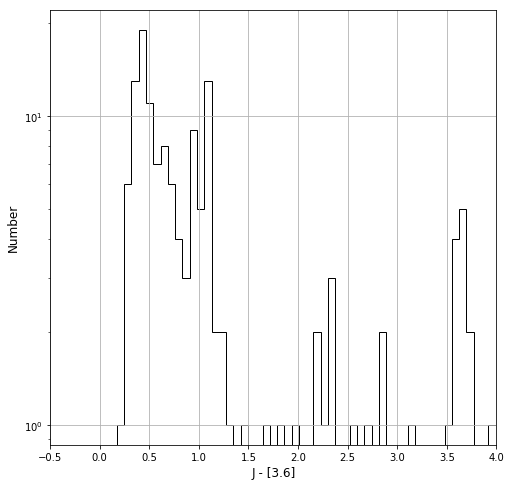

In [54]:
# 54

# Bin 20 ([3.6] = 14.300 to 13.883, center @ 14.0915) <- triple-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=14.300, linewidth=1.0, color='red') # Bin 20 - lower boundary
plt.axhline(y=13.883, linewidth=1.0, color='red') # Bin 20 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 14.300) & (color_cuts.k36mag > 13.883)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/3.5, binwidth/3.5), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

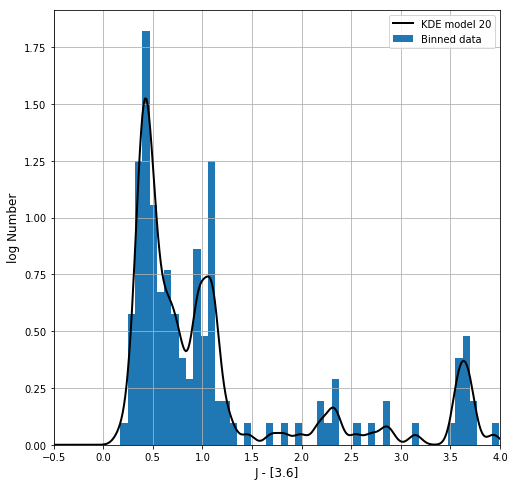

In [55]:
# 54

# Bin 20 ([3.6] = 14.300 to 13.883, center @ 14.0915) <- triple-wide bin
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/3.5, binwidth/3.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/4.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 20')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.832, 0.835)
#plt.ylim(0.411, 0.414)
#plt.xlim(1.40, 1.41)
#plt.ylim(0.044, 0.046)
#plt.xlim(1.574, 1.58)
#plt.ylim(0.017, 0.018)
#plt.xlim(3.34, 3.344)
#plt.ylim(0.0009, 0.001)
#plt.xlim(2.49, 2.495)
#plt.ylim(0.042, 0.043)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  14.0915
### boundary 1: J-[3.6] = 0.833
### boundary 2: J-[3.6] = 1.404
### boundary 3: J-[3.6] = 1.577 *2.493*
### boundary 4: J-[3.6] = 3.342

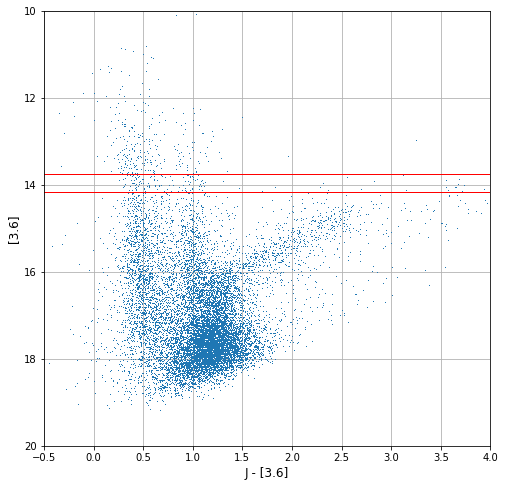

134
0.2163809523809524


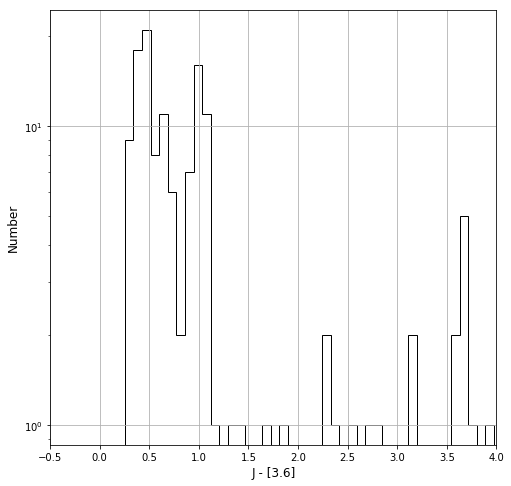

In [56]:
# 56

# Bin 21 ([3.6] = 14.161 to 13.744, center @ 13.9525) <- triple-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=14.161, linewidth=1.0, color='red') # Bin 21 - lower boundary
plt.axhline(y=13.744, linewidth=1.0, color='red') # Bin 21 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 14.161) & (color_cuts.k36mag > 13.744)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/2.5, binwidth/2.5), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

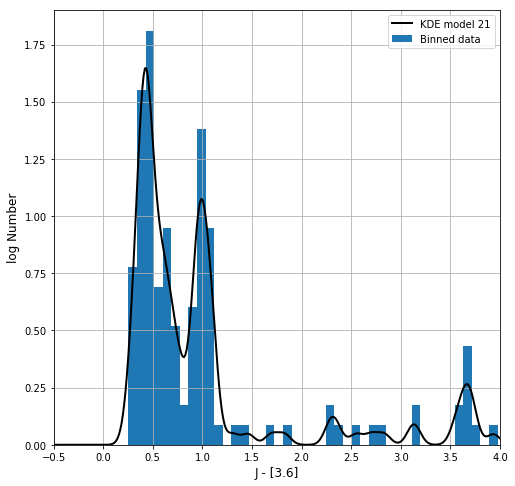

In [57]:
# 57

# Bin 21 ([3.6] = 14.161 to 13.744, center @ 13.9525) <- triple-wide bin
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/2.5, binwidth/2.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/3.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 21')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.813, 0.817)
#plt.ylim(0.382, 0.384)
#plt.xlim(1.3775, 1.380)
#plt.ylim(0.04375, 0.044)
#plt.xlim(1.574, 1.576)
#plt.ylim(0.0185, 0.01875)
#plt.xlim(3.344, 3.347)
#plt.ylim(0.0009, 0.00095)
#plt.xlim(2.963, 2.968)
#plt.ylim(0.009, 0.01)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  13.9525
### boundary 1: J-[3.6] = 0.815
### boundary 2: J-[3.6] = 1.379
### boundary 3: J-[3.6] = 1.575 *2.965*
### boundary 4: J-[3.6] = 3.346

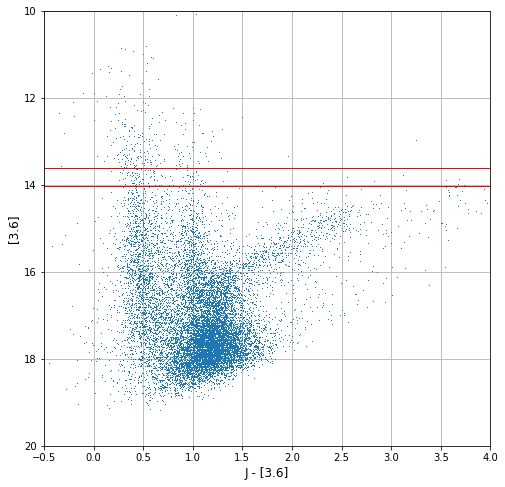

117
0.18644


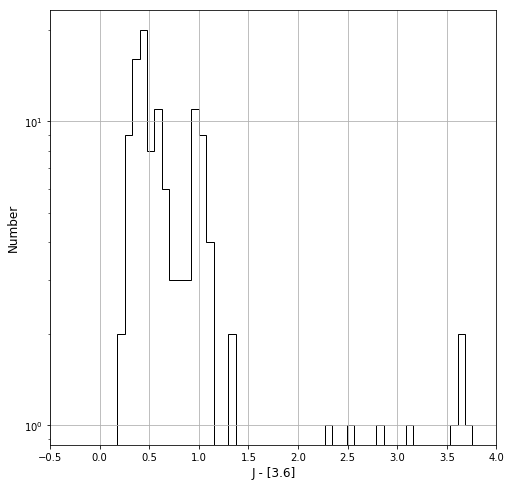

In [58]:
# 58

# Bin 22 ([3.6] = 14.022 to 13.605, center @ 13.8135) <- triple-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=14.022, linewidth=1.0, color='red') # Bin 22 - lower boundary
plt.axhline(y=13.605, linewidth=1.0, color='red') # Bin 22 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 14.022) & (color_cuts.k36mag > 13.605)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/2.5, binwidth/2.5), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

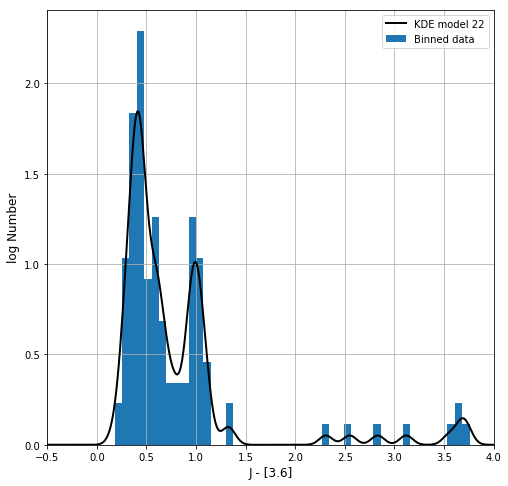

In [59]:
# 59

# Bin 22 ([3.6] = 14.022 to 13.605, center @ 13.8135) <- triple-wide bin
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/2.5, binwidth/2.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/2.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 22')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.80, 0.82)
#plt.ylim(0.388, 0.390)
#plt.xlim(1.245, 1.25)
#plt.ylim(0.076, 0.077)
#plt.xlim(1.82, 1.825)
#plt.ylim(0.0, 0.000000000001)
#plt.xlim(3.329, 3.332)
#plt.ylim(0.0004, 0.0006)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  13.8135
### boundary 1: J-[3.6] = 0.808
### boundary 2: J-[3.6] = 1.248
### boundary 3: J-[3.6] = 1.822
### boundary 4: J-[3.6] = 3.330

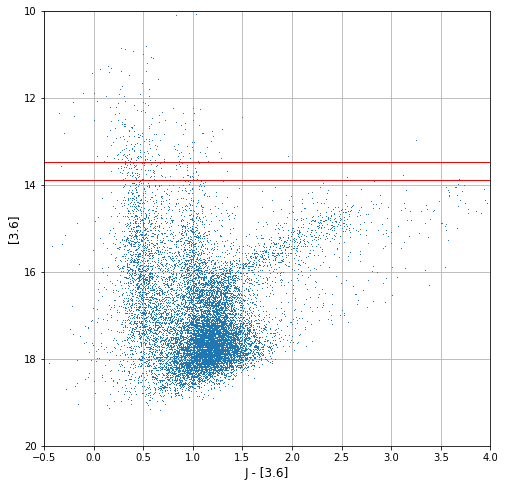

102
0.19725000000000004


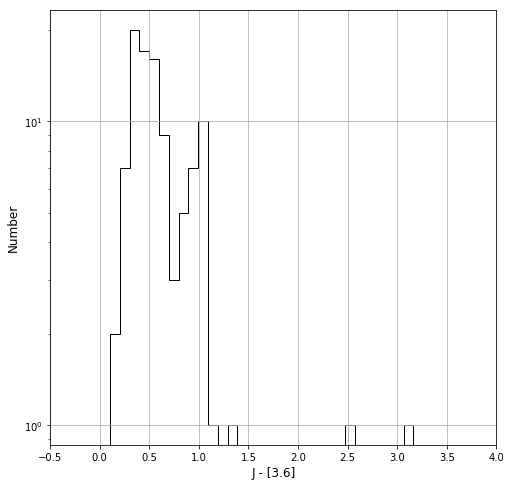

In [60]:
# 60

# Bin 23 ([3.6] = 13.883 to 13.466, center @ 13.6745) <- triple-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=13.883, linewidth=1.0, color='red') # Bin 23 - lower boundary
plt.axhline(y=13.466, linewidth=1.0, color='red') # Bin 23 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 13.883) & (color_cuts.k36mag > 13.466)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/2., binwidth/2.), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

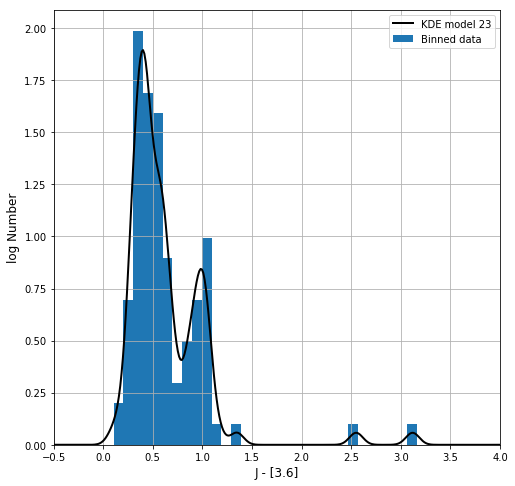

In [61]:
# 61

# Bin 23 ([3.6] = 13.883 to 13.466, center @ 13.6745) <- triple-wide bin
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/2., binwidth/2.)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/2.)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 23')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.78, 0.80)
#plt.ylim(0.40, 0.42)
#plt.xlim(1.25, 1.28)
#plt.ylim(0.04, 0.05)
#plt.xlim(1.9525, 1.9550)
#plt.ylim(0.0, 0.000000000000000002)
#plt.xlim(3.69, 3.71)
#plt.ylim(0.0, 0.0000000000000001)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  13.6745
### boundary 1: J-[3.6] = 0.793
### boundary 2: J-[3.6] = 1.265
### boundary 3: J-[3.6] = 1.953
### boundary 4: J-[3.6] = 3.708
### boundary 5: J-[3.6] = 

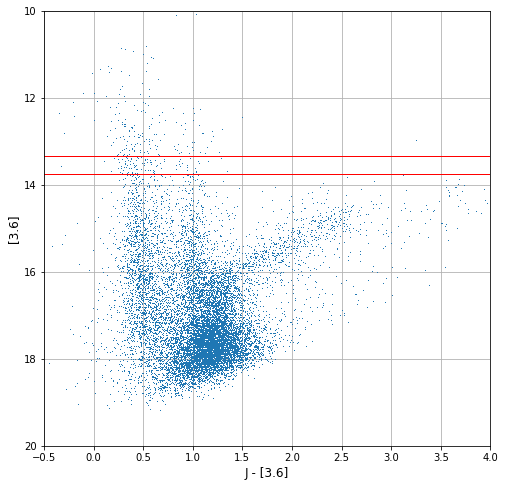

99
0.16006666666666666


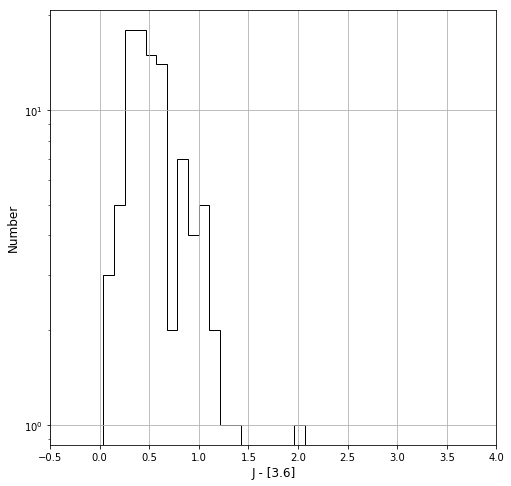

In [62]:
# 62

# Bin 24 ([3.6] = 13.744 to 13.327, center @ 13.5355) <- triple-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=13.744, linewidth=1.0, color='red') # Bin 24 - lower boundary
plt.axhline(y=13.327, linewidth=1.0, color='red') # Bin 24 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 13.744) & (color_cuts.k36mag > 13.327)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/1.5, binwidth/1.5), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

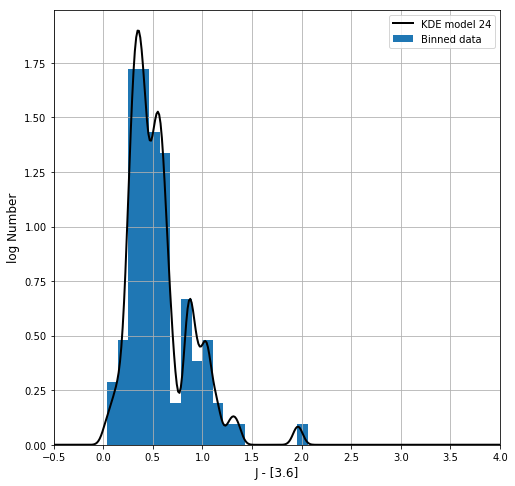

In [63]:
# 63

# Bin 24 ([3.6] = 13.744 to 13.327, center @ 13.5355) <- triple-wide bin
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/1.5, binwidth/1.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/2.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 24')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.765, 0.775)
#plt.ylim(0.23, 0.25)
#plt.xlim(1.23, 1.235)
#plt.ylim(0.085, 0.09)
#plt.xlim(1.64, 1.67)
#plt.ylim(0.0, 0.000000001)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  13.5355
### boundary 1: J-[3.6] = 0.769
### boundary 2: J-[3.6] = 1.233
### boundary 3: J-[3.6] = 1.655
### boundary 4: J-[3.6] = 

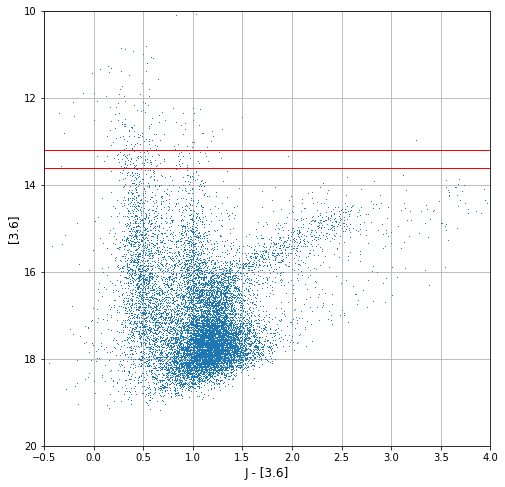

93
0.18791666666666665


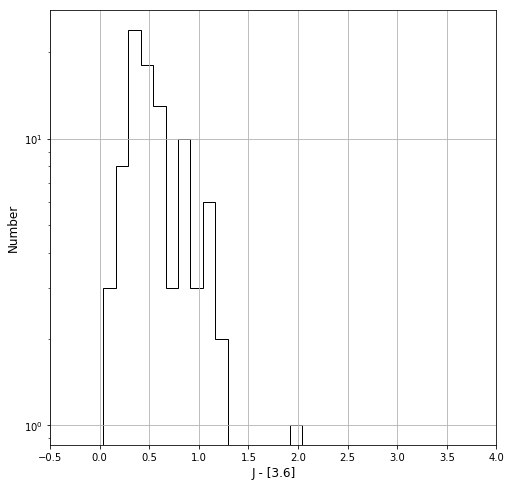

In [64]:
# 64

# Bin 25 ([3.6] = 13.605 to 13.188, center @ 13.3965) <- triple-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=13.605, linewidth=1.0, color='red') # Bin 25 - lower boundary
plt.axhline(y=13.188, linewidth=1.0, color='red') # Bin 25 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 13.605) & (color_cuts.k36mag > 13.188)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/1.5, binwidth/1.5), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

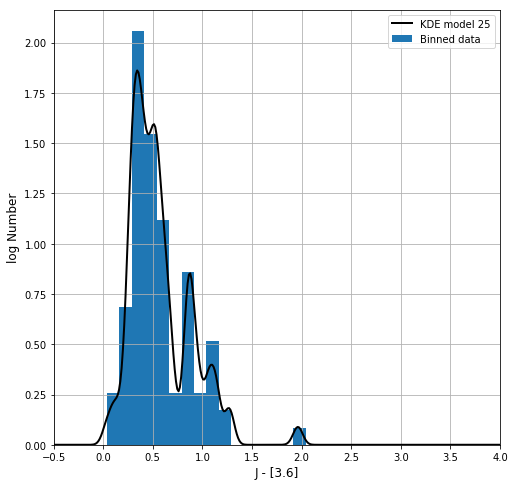

In [65]:
# 65

# Bin 25 ([3.6] = 13.605 to 13.188, center @ 13.3965) <- triple-wide bin
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/1.5, binwidth/1.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/2.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 25')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.75, 0.77)
#plt.ylim(0.265, 0.270)
#plt.xlim(1.216, 1.217)
#plt.ylim(0.166, 0.168)
#plt.xlim(1.615, 1.625)
#plt.ylim(0.0, 0.00000000001)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  13.5355
### boundary 1: J-[3.6] = 0.760
### boundary 2: J-[3.6] = 1.217
### boundary 3: J-[3.6] = 1.621
### boundary 4: J-[3.6] = 
### boundary 5: J-[3.6] = 

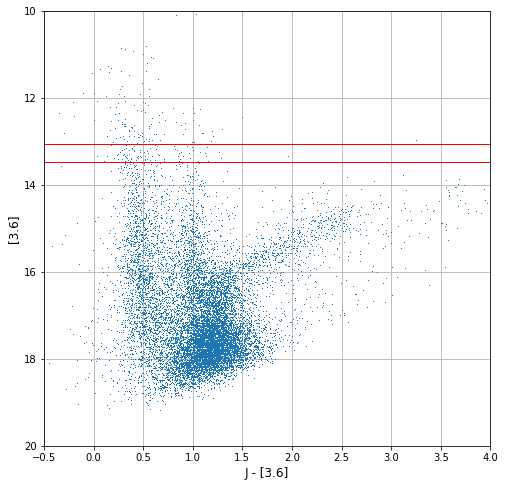

78
0.20888461538461536


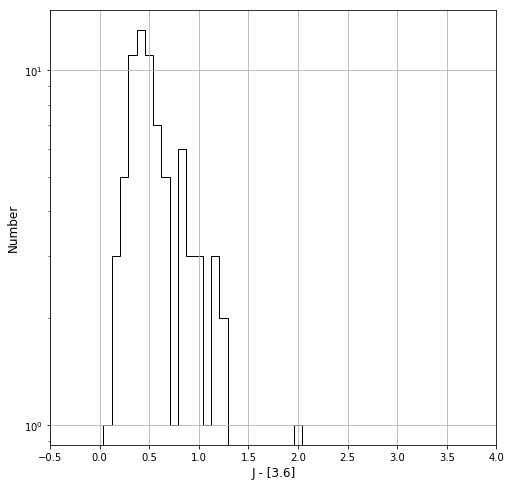

In [66]:
# 66

# Bin 26 ([3.6] = 13.466 to 13.049, center @ 13.2575) <- triple-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=13.466, linewidth=1.0, color='red') # Bin 26 - lower boundary
plt.axhline(y=13.049, linewidth=1.0, color='red') # Bin 26 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 13.466) & (color_cuts.k36mag > 13.049)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/2.5, binwidth/2.5), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

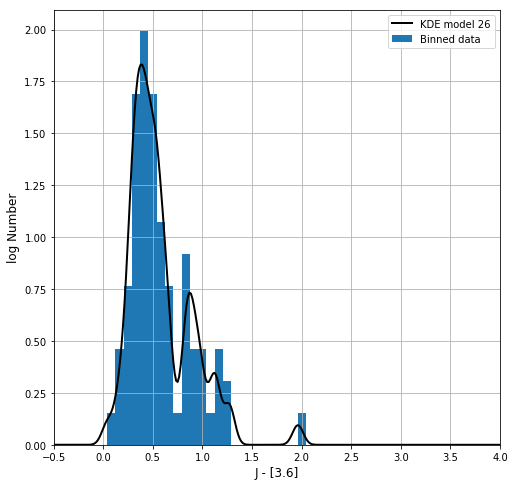

In [67]:
# 67

# Bin 26 ([3.6] = 13.466 to 13.049, center @ 13.2575) <- triple-wide bin
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/2.5, binwidth/2.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/3.)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 26')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.748, 0.752)
#plt.ylim(0.30, 0.305)
#plt.xlim(1.1, 1.3)
#plt.ylim(0.19, 0.21)
#plt.xlim(1.62, 1.64)
#plt.ylim(0.0, 0.000000001)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  13.5355
### boundary 1: J-[3.6] = 0.751
### boundary 2: J-[3.6] = 1.225
### boundary 3: J-[3.6] = 1.630
### boundary 4: J-[3.6] = 

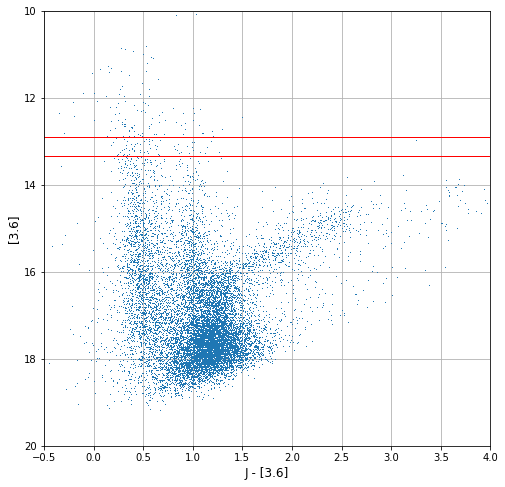

60
0.25190476190476185


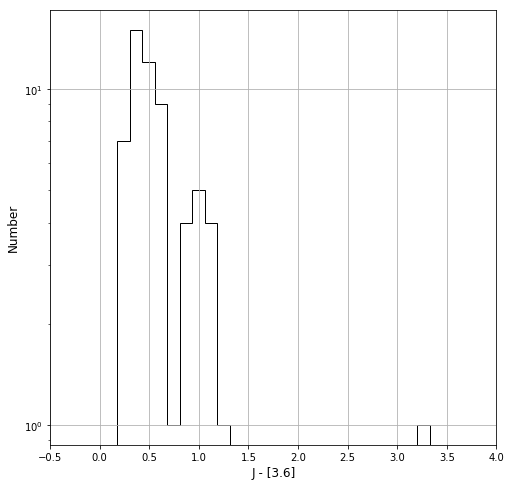

In [68]:
# 68

# Bin 27 ([3.6] = 13.327 to 12.910, center @ 13.1185) <- triple-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=13.327, linewidth=1.0, color='red') # Bin 27 - lower boundary
plt.axhline(y=12.910, linewidth=1.0, color='red') # Bin 27 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 13.327) & (color_cuts.k36mag > 12.910)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/2., binwidth/2.), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

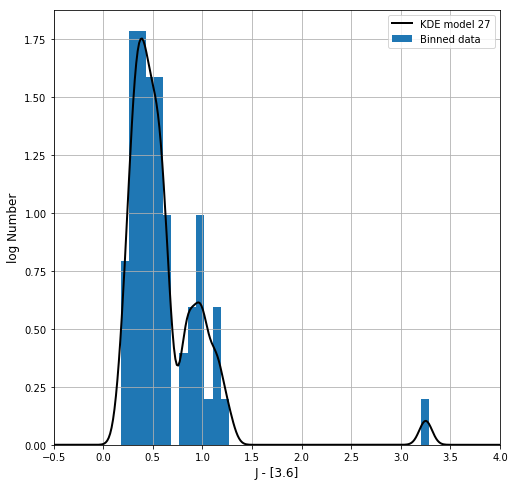

In [69]:
# 69

# Bin 27 ([3.6] = 13.327 to 12.910, center @ 13.1185)
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/3., binwidth/3.)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/3.)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 27')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.755, 0.760)
#plt.ylim(0.34, 0.345)
#plt.xlim(1.50, 1.60)
#plt.ylim(0.0, 0.00001)

plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  13.1185
### boundary 1: J-[3.6] = 0.757
### boundary 2: J-[3.6] = 1.560*
### boundary 3: J-[3.6] = 
### boundary 4: J-[3.6] = 

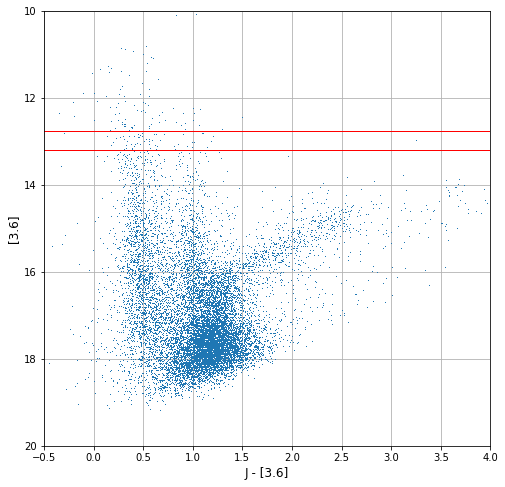

53
0.19896551724137929


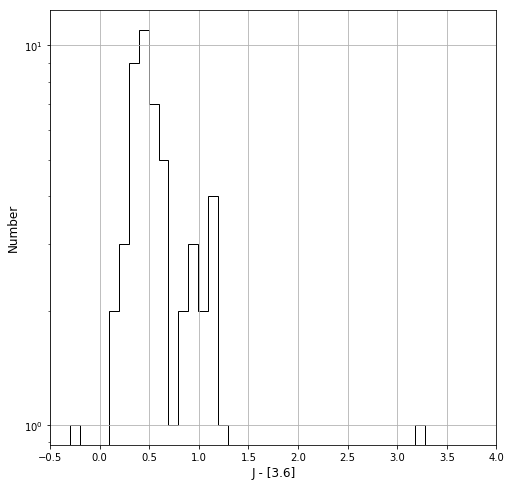

In [70]:
# 70

# Bin 28 ([3.6] = 13.188 to 12.771, center @ 12.9795) <- triple-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=13.188, linewidth=1.0, color='red') # Bin 28 - lower boundary
plt.axhline(y=12.771, linewidth=1.0, color='red') # Bin 28 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 13.188) & (color_cuts.k36mag > 12.771)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/2., binwidth/2.), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

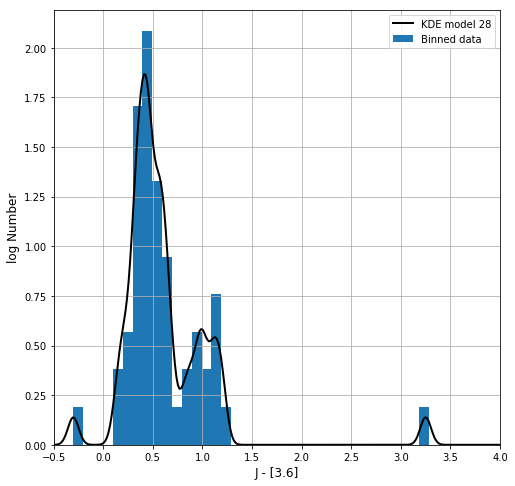

In [71]:
# 71

# Bin 28 ([3.6] = 13.188 to 12.771, center @ 12.9795)
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/2., binwidth/2.)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/3.)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 28')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.76, 0.78)
#plt.ylim(0.28, 0.29)
#plt.xlim(1.47, 1.48)
#plt.ylim(0.0, 0.000001)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  12.9795
### boundary 1: J-[3.6] = 0.770
### boundary 2: J-[3.6] = 1.470*
### boundary 3: J-[3.6] = 
### boundary 4: J-[3.6] = 

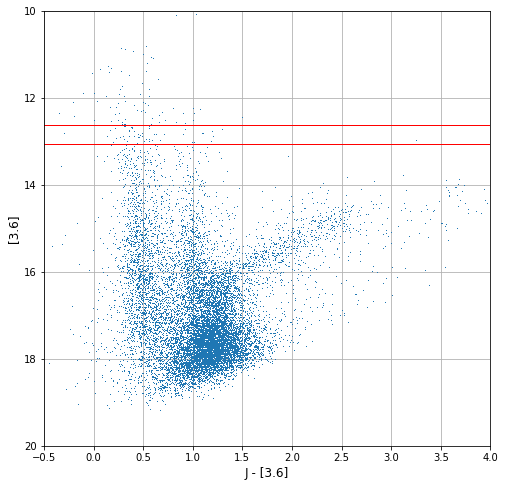

50
0.16914285714285718


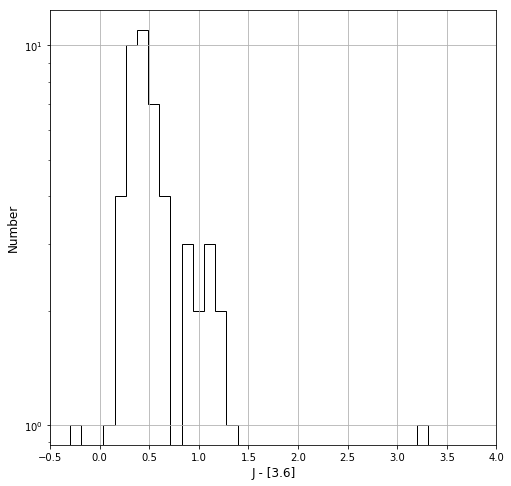

In [72]:
# 72

# Bin 29 ([3.6] = 13.049 to 12.632, center @ 12.8405)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSthreesix, phot_data.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.axhline(y=13.049, linewidth=1.0, color='red') # Bin 29 - lower boundary
plt.axhline(y=12.632, linewidth=1.0, color='red') # Bin 29 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [3.6] magnitudes over which the bin is sampling
# from the catalog of sources with [3.6]-mag and J-mag errors less than 0.1.
#
jMINUSthreesixHIST = color_cuts[(color_cuts.k36mag < 13.049) & (color_cuts.k36mag > 12.632)]
#print jMINUSthreesixHIST
print len(jMINUSthreesixHIST)
#
binwidth = stats.knuth_bin_width(jMINUSthreesixHIST.jMINUSthreesix)
bin_number = (max(jMINUSthreesixHIST.jMINUSthreesix)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSthreesixHIST.jMINUSthreesix, bins=np.arange(min(jMINUSthreesixHIST.jMINUSthreesix), max(jMINUSthreesixHIST.jMINUSthreesix) + binwidth/1.5, binwidth/1.5), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-0.5, 4.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

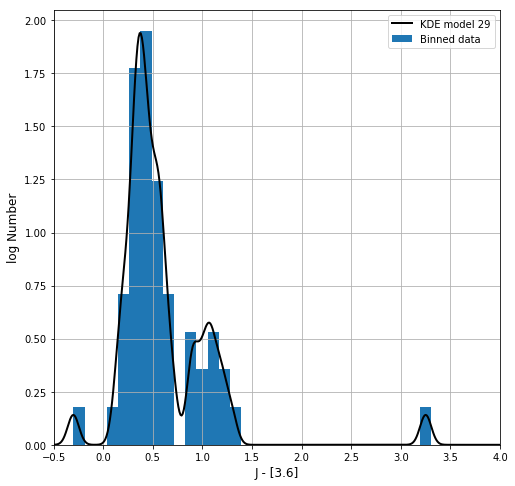

In [73]:
# 73

# Bin 29 ([3.6] = 13.049 to 12.632, center @ 12.8405)
#
kde_data = jMINUSthreesixHIST.jMINUSthreesix.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/1.5, binwidth/1.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 29')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)
#plt.xlim(0.79, 0.795)
#plt.ylim(0.135, 0.14)

plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [3.6] =  12.8405
### boundary 1: J-[3.6] = 0.791
### boundary 2: J-[3.6] = 
### boundary 3: J-[3.6] = 
### boundary 4: J-[3.6] = 
### boundary 5: J-[3.6] = 

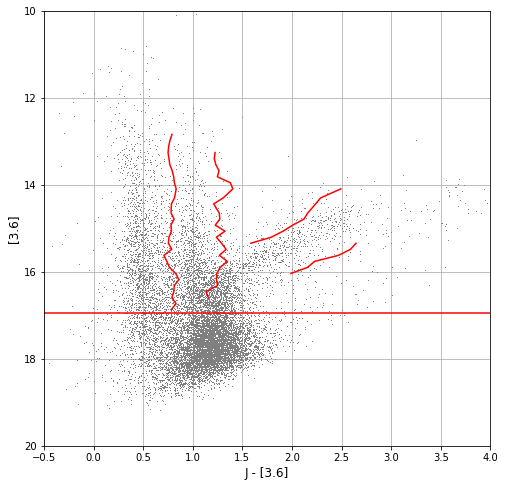

In [74]:
# 74

# [3.6] vs J-[3.6]
# CMD with color-cut points and lines
#
plt.figure(figsize=(8,8))
plt.plot(jMINUSthreesixDATA.jMINUSthreesix, jMINUSthreesixDATA.k36mag, ',', color='gray')
#plt.xlim(-1.0, 6.0)
plt.xlim(-0.5, 4.0)
#plt.ylim(20.5, 8.5)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
### plot points
#yvalues1 = [16.8715, 16.7325, 16.5935, 16.4545, 16.3155, 16.1765, 16.0375, 15.8985, 15.7595, 15.6205, 15.4815, 15.3425, 15.2035, 15.0645, 14.9255, 14.7865, 14.6475, 14.4390, 14.3000, 14.0915, 13.9525, 13.8135, 13.6745, 13.5355, 13.3965, 13.2575, 13.1185, 12.9795, 12.8405]
yvalues2 = [16.5935, 16.4545, 16.3155, 16.1765, 16.0375, 15.8985, 15.7595, 15.6205, 15.4815, 15.3425, 15.2035, 15.0645, 14.9255, 14.7865, 14.6475, 14.4390, 14.3000, 14.0915, 13.9525, 13.8135, 13.6745, 13.5355, 13.3965, 13.2575]#, 13.1185, 12.9795]
#yvalues3 = [15.8985, 15.7595, 15.6205, 15.4815, 15.3425, 15.2035, 15.0645, 14.9255, 14.7865, 14.6475, 14.4390, 14.3000, 14.0915, 13.9525]#, 13.8135, 13.6745, 13.5355, 13.3965, 13.2575]
#yvalues4 = [16.8715, 16.7325, 16.5935, 16.4545, 16.3155, 16.1765, 16.0375, 15.8985, 15.7595, 15.6205, 15.4815, 15.3425, 15.2035, 15.0645, 14.9255, 14.7865, 14.6475, 14.4390, 14.3000, 14.0915, 13.9525, 13.8135]#, 13.6745]
#boundary1 = [0.782, 0.832, 0.789, 0.809, 0.814, 0.860, 0.828, 0.765, 0.739, 0.709, 0.789, 0.754, 0.760, 0.785, 0.780, 0.812, 0.781, 0.785, 0.816, 0.833, 0.815, 0.808, 0.793, 0.769, 0.760, 0.751, 0.757, 0.770, 0.791]
boundary2 = [1.158, 1.133, 1.250, 1.239, 1.243, 1.276, 1.349, 1.269, 1.336, 1.290, 1.238, 1.325, 1.227, 1.273, 1.267, 1.211, 1.307, 1.404, 1.379, 1.248, 1.265, 1.233, 1.217, 1.225]#, 1.560, 1.470]
#boundary3 = [1.446, 1.484, 1.413, 1.515, 1.509, 1.451, 1.557, 1.480, 1.692, 1.615, 1.587, 1.576, 1.577, 1.575]#, 1.822, 1.953, 1.655, 1.621, 1.630]
#boundary4 = [1.818, 1.787, 1.920, 1.883, 1.819, 2.343, 1.989, 2.156, 2.228, 2.470, 2.590, 2.646, 2.833, 2.825, 2.639, 2.818, 2.958, 3.252, 3.281, 3.342, 3.346, 3.330]#, 3.708]
#
yvalues1 = np.array([16.8715, 16.7325, 16.5935, 16.4545, 16.3155, 16.1765, 16.0375, 15.8985, 15.7595, 15.6205, 15.4815, 15.3425, 15.2035, 15.0645, 14.9255, 14.7865, 14.6475, 14.4390, 14.3000, 14.0915, 13.9525, 13.8135, 13.6745, 13.5355, 13.3965, 13.2575, 13.1185, 12.9795, 12.8405])
#yvalues2 = np.array([16.5935, 16.4545, 16.3155, 16.1765, 16.0375])#, 15.8985, 15.7595, 15.6205, 15.4815, 15.3425, 15.2035, 15.0645, 14.9255, 14.7865, 14.6475, 14.4390, 14.3000, 14.0915, 13.9525, 13.8135, 13.6745, 13.5355, 13.3965, 13.2575])#, 13.1185, 12.9795]
#yvalues3a = np.array([15.8985, 15.7595, 15.6205, 15.4815, 15.3425, 15.2035, 15.0645, 14.9255, 14.7865, 14.6475, 14.4390, 14.3000, 14.0915, 13.9525])#, 13.8135, 13.6745, 13.5355, 13.3965, 13.2575]
yvalues3b = np.array([15.3425, 15.2035, 15.0645, 14.9255, 14.7865, 14.6475, 14.4390, 14.3000, 14.0915]) #, 13.9525 16.8715, 16.7325, 16.5935, 16.4545, 16.3155, 16.1765, 16.0375, 15.8985, 15.7595, 15.6205, 15.4815, 
yvalues4 = np.array([16.0375, 15.8985, 15.7595, 15.6205, 15.4815, 15.3425])#, 15.2035, 15.0645, 14.9255, 14.7865, 14.6475, 14.4390, 14.3000, 14.0915, 13.9525, 13.8135])#, 13.6745], 16.8715, 16.7325, 16.5935, 16.4545, 16.3155, 16.1765, 
boundary1 = np.array([0.782, 0.832, 0.789, 0.809, 0.814, 0.860, 0.828, 0.765, 0.739, 0.709, 0.789, 0.754, 0.760, 0.785, 0.780, 0.812, 0.781, 0.785, 0.816, 0.833, 0.815, 0.808, 0.793, 0.769, 0.760, 0.751, 0.757, 0.770, 0.791])
#boundary2 = np.array([1.158, 1.133, 1.250, 1.239, 1.243])#, 1.276, 1.349, 1.269, 1.336, 1.290, 1.238, 1.325, 1.227, 1.273, 1.267, 1.211, 1.307, 1.404, 1.379, 1.248, 1.265, 1.233, 1.217, 1.225])#, 1.560, 1.470]
#boundary3a = np.array([1.446, 1.484, 1.413, 1.515, 1.509, 1.451, 1.557, 1.480, 1.692, 1.615, 1.587, 1.576, 1.577, 1.575])#, 1.822, 1.953, 1.655, 1.621, 1.630]
boundary3b = np.array([1.585, 1.792, 1.910, 2.008, 2.121, 2.159, 2.238, 2.289, 2.493]) #, 2.965 1.455, 1.575, 1.594, 1.525, 1.525, 1.515, 1.523, 1.446, 1.484, 1.477,  1.515, 
boundary4 = np.array([1.989, 2.156, 2.228, 2.470, 2.590, 2.646])#, 2.833, 2.825, 2.639, 2.818, 2.958, 3.252, 3.281, 3.342, 3.346, 3.330])#, 3.708], 1.818, 1.787, 1.920, 1.883, 1.819, 2.343, 
#
plt.plot(boundary1, yvalues1, color='red')
plt.plot(boundary2, yvalues2, color='red')
#plt.plot(boundary3a, yvalues3a)
plt.plot(boundary3b, yvalues3b, color='red')
plt.plot(boundary4, yvalues4, color='red')
plt.axhline(y=16.941, linewidth=1.5, color='red') # TRGB threshold
#
plt.grid(True)
plt.show()
plt.close()
#plt.savefig('[3.6]_vs_J-[3.6]_color-cuts_AAS.pdf')

8.062146452821322 8.524252538047314
-3.8272383100774814 19.790442065440516
-5.5993513937123085 23.555019277339948
-1.6549383893216707 19.619833999195382


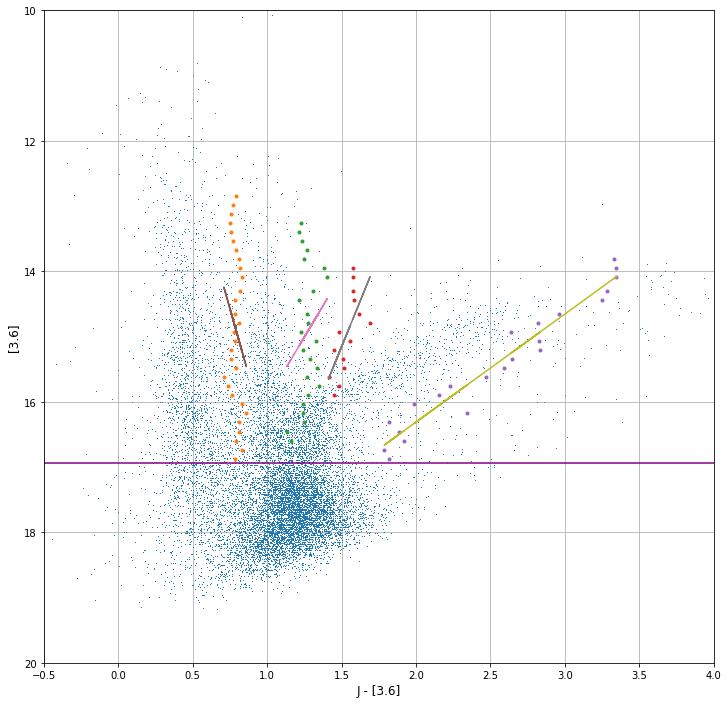

In [75]:
#75

# Use POLYFIT to fit these points to a line.

from numpy.polynomial.polynomial import polyfit

yvalues1 = np.array([16.8715, 16.7325, 16.5935, 16.4545, 16.3155, 16.1765, 16.0375, 15.8985, 15.7595, 15.6205, 15.4815, 15.3425, 15.2035, 15.0645, 14.9255, 14.7865, 14.6475, 14.4390, 14.3000, 14.0915, 13.9525, 13.8135, 13.6745, 13.5355, 13.3965, 13.2575, 13.1185, 12.9795, 12.8405])
yvalues2 = np.array([16.5935, 16.4545, 16.3155, 16.1765, 16.0375, 15.8985, 15.7595, 15.6205, 15.4815, 15.3425, 15.2035, 15.0645, 14.9255, 14.7865, 14.6475, 14.4390, 14.3000, 14.0915, 13.9525, 13.8135, 13.6745, 13.5355, 13.3965, 13.2575])#, 13.1185, 12.9795]
yvalues3 = np.array([15.8985, 15.7595, 15.6205, 15.4815, 15.3425, 15.2035, 15.0645, 14.9255, 14.7865, 14.6475, 14.4390, 14.3000, 14.0915, 13.9525])#, 13.8135, 13.6745, 13.5355, 13.3965, 13.2575]
yvalues4 = np.array([16.8715, 16.7325, 16.5935, 16.4545, 16.3155, 16.1765, 16.0375, 15.8985, 15.7595, 15.6205, 15.4815, 15.3425, 15.2035, 15.0645, 14.9255, 14.7865, 14.6475, 14.4390, 14.3000, 14.0915, 13.9525, 13.8135])#, 13.6745]
boundary1 = np.array([0.782, 0.832, 0.789, 0.809, 0.814, 0.860, 0.828, 0.765, 0.739, 0.709, 0.789, 0.754, 0.760, 0.785, 0.780, 0.812, 0.781, 0.785, 0.816, 0.833, 0.815, 0.808, 0.793, 0.769, 0.760, 0.751, 0.757, 0.770, 0.791])
boundary2 = np.array([1.158, 1.133, 1.250, 1.239, 1.243, 1.276, 1.349, 1.269, 1.336, 1.290, 1.238, 1.325, 1.227, 1.273, 1.267, 1.211, 1.307, 1.404, 1.379, 1.248, 1.265, 1.233, 1.217, 1.225])#, 1.560, 1.470]
boundary3 = np.array([1.446, 1.484, 1.413, 1.515, 1.509, 1.451, 1.557, 1.480, 1.692, 1.615, 1.587, 1.576, 1.577, 1.575])#, 1.822, 1.953, 1.655, 1.621, 1.630]
boundary4 = np.array([1.818, 1.787, 1.920, 1.883, 1.819, 2.343, 1.989, 2.156, 2.228, 2.470, 2.590, 2.646, 2.833, 2.825, 2.639, 2.818, 2.958, 3.252, 3.281, 3.342, 3.346, 3.330])#, 3.708]
#
#yvalues1test = np.array([16.8715, 16.5935, 16.3155, 16.0375, 15.7595, 15.4815, 15.2035, 14.9255, 14.6475, 14.3000, 13.9525, 13.6745, 13.3965, 13.1185, 12.8405])
#boundary1test = np.array([0.782, 0.789, 0.814, 0.828, 0.739, 0.789, 0.760, 0.780, 0.781, 0.816, 0.815, 0.793, 0.760, 0.757, 0.791])
#
b1, m1 = polyfit(boundary1, yvalues1, 1)
b2, m2 = polyfit(boundary2, yvalues2, 1)
b3, m3 = polyfit(boundary3, yvalues3, 1)
b4, m4 = polyfit(boundary4, yvalues4, 1)
#
#b1test, m1test = polyfit(boundary1test, yvalues1test, 1)

#print m1, m2, m3, m4
#print b1, b2, b3, b4

print m1, b1
print m2, b2
print m3, b3
print m4, b4

plt.figure(figsize=(12,12))
plt.plot(jMINUSthreesixDATA.jMINUSthreesix, jMINUSthreesixDATA.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#
plt.plot(boundary1, yvalues1, '.')
plt.plot(boundary2, yvalues2, '.')
plt.plot(boundary3, yvalues3, '.')
plt.plot(boundary4, yvalues4, '.')
#
#plt.plot(boundary1test, yvalues1test, '.')

plt.plot(boundary1, b1 + m1 * boundary1, '-')
plt.plot(boundary2, b2 + m2 * boundary2, '-')
plt.plot(boundary3, b3 + m3 * boundary3, '-')
plt.plot(boundary4, b4 + m4 * boundary4, '-')
#
#plt.plot(boundary1test, b1test + m1test * boundary1test, '-')

plt.axhline(y=16.941, linewidth=1.5, color='purple') # TRGB threshold

plt.grid(True)
plt.show()
plt.close()
#plt.savefig('[3.6]_vs_J-[3.6]_color-cuts_1.pdf')

### functions:
# boundary 1: [3.6] = 8.062146452821322 * (J-[3.6]) + 8.524252538047314
# boundary 2: [3.6] = -3.8272383100774814 * (J-[3.6]) + 19.790442065440516
# boundary 3: [3.6] = -5.5993513937123085 * (J-[3.6]) + 23.555019277339948
# boundary 4: [3.6] = -1.6549383893216707 * (J-[3.6]) + 19.619833999195382


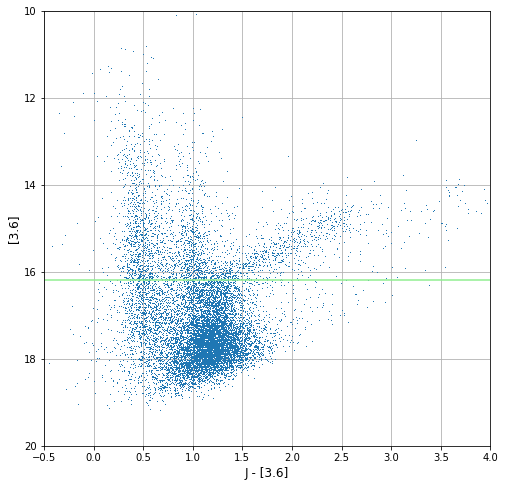

1819
0.21444444444444422
85.12435233160632


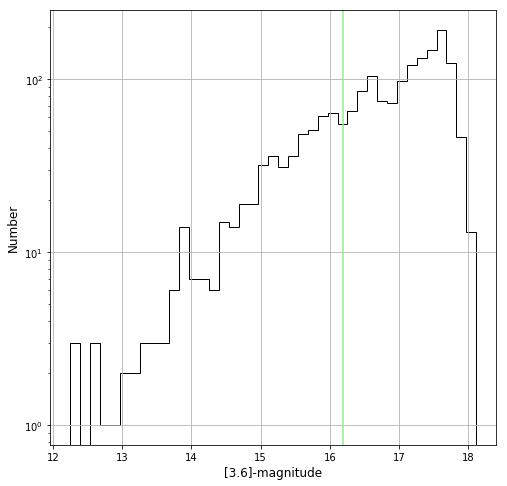

In [76]:
# 76

# In addition to the TRGB threshold at roughly [3.6] = 17, there appears to be a
# minor inflection point at just below [3.6] = 16 (so like 16.1) which represents 
# (maybe) a distinction between AGB stars and RSG stars.
#
# I'm going to use the same technique I used to define where the TRGB is
# and see if I can pinpoint a boundary I can employ to distinguish between
# these two populations.
#
# The physical reasoning here is that AGB stars can only be so luminous,
# intrinsically, so anything brighter than some limit must be something else.
#
# Not to cherry pick, but I think I need to restrict the data over an x-value range
# (J-[3.6]) that makes sense to look for such a gap, which I think should be something
# like J-[3.6] = 0.9 to 1.2.

plt.figure(figsize=(8,8))
plt.plot(jMINUSthreesixDATA.jMINUSthreesix, jMINUSthreesixDATA.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
plt.axhline(y=16.183, linewidth=1.5, color='lightgreen') # RSG/AGB boundary value determined from KDE below
plt.grid(True)
plt.show()
plt.close()

# Define boundaries for data to set RSG/AGB boundary:

RSGAGB_hist = low_error_jMINUSthreesixDATA[(low_error_jMINUSthreesixDATA.jMINUSthreesix < 1.10)
                                 & (low_error_jMINUSthreesixDATA.jMINUSthreesix > 0.90)
                                          & (low_error_jMINUSthreesixDATA.k36mag > 12.0)]

print len(RSGAGB_hist)

# Next I'll compute the optimum bin width using Knuth's Algorithm
# over which the histogram will plot the data, then print out this
# value and the number of bins that will be implemented.

binwidth = (stats.knuth_bin_width(RSGAGB_hist.k36mag))
bin_number = (max(RSGAGB_hist.k36mag)+binwidth)/binwidth

print binwidth
print bin_number

# Finally, here's the histogram of the relevant data:

fig = plt.figure(figsize = (8,8))
plt.hist(RSGAGB_hist.k36mag, bins=np.arange(min(RSGAGB_hist.k36mag), max(RSGAGB_hist.k36mag) + binwidth/1.5, binwidth/1.5), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
#plt.xlim(16.0, 18.0)
#plt.ylim(100.0, 1000.0)
plt.xlabel('[3.6]-magnitude', size=12)
plt.ylabel('Number', size=12)
plt.axvline(x=16.183, linewidth=1.5, color='lightgreen') # RSG/AGB boundary value determined from KDE below
plt.grid(True)
plt.show()
plt.close()
#plt.savefig('[3.6]_vs_J-[3.6]_RSGAGB_histogram.pdf')

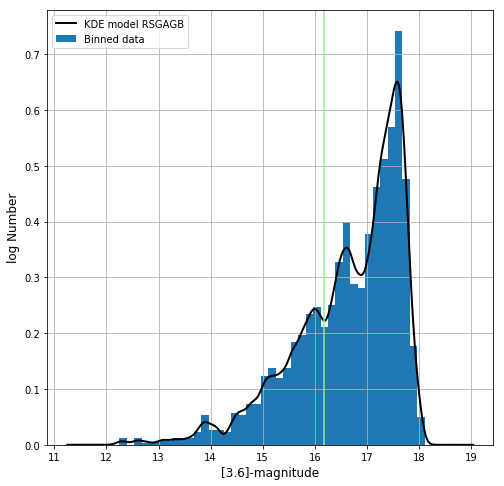

In [77]:
# 77

# Although the data are restricted to a fairly small J-[3.6] range, I think it best
# represents the location of where we expect to see this gap in sources.

kde_data_RSGAGB = RSGAGB_hist.k36mag.values
bins=np.arange(min(kde_data_RSGAGB ), max(kde_data_RSGAGB ) + binwidth/1.5, binwidth/1.5)
x_eval_RSGAGB = np.linspace(kde_data_RSGAGB.min() - 1.0, kde_data_RSGAGB.max() + 1.0, 500)
kde_RSGAGB = gaussian_kde(kde_data_RSGAGB,bw_method=binwidth/2.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval_RSGAGB, kde_RSGAGB(x_eval_RSGAGB),'k',lw=2,label='KDE model RSGAGB')
plt.hist(kde_data_RSGAGB,bins=bins,normed=True,label='Binned data')
#plt.xlim(16.180, 16.185)
#plt.ylim(0.222, 0.223)
plt.legend()
plt.xlabel('[3.6]-magnitude', size=12)
plt.ylabel('log Number', size=12)
#plt.axvline(x=17.41, linewidth=1.5, color='orange') # Sibbons+ (2012) TRGB value
plt.axvline(x=16.183, linewidth=1.5, color='lightgreen') # RSG/AGB boundary value determined from KDE below
#plt.axvline(x=16.3265, linewidth=1.5, color='cyan') # some other minimum
plt.grid(True)
plt.show()
plt.close()
#plt.savefig('[3.6]_vs_J-[3.6]_RSGAGB_KDE.pdf')

81
0.08283333333333331
37.193158953722346


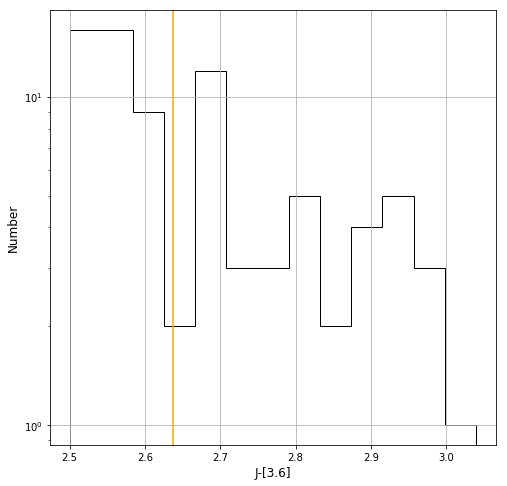

In [78]:
# 78

# I decided I wanted to be a little bit more exact concerning the vertical boundary
# of the extremely dusty objects that might be AGB stars or YSOs,
# so I'm going to run one more histogram analysis out here.

# Define boundaries for data to set extremely dusty objects boundary:

extreme_hist = low_error_jMINUSthreesixDATA[(low_error_jMINUSthreesixDATA.k36mag < 16.0)
                                 & (low_error_jMINUSthreesixDATA.k36mag > 14.0)
                                    & (low_error_jMINUSthreesixDATA.jMINUSthreesix < 3.0)
                                    & (low_error_jMINUSthreesixDATA.jMINUSthreesix > 2.5)]

print len(extreme_hist)

# Next I'll compute the optimum bin width using Knuth's Algorithm
# over which the histogram will plot the data, then print out this
# value and the number of bins that will be implemented.

binwidth = (stats.knuth_bin_width(extreme_hist.jMINUSthreesix))
bin_number = (max(extreme_hist.jMINUSthreesix)+binwidth)/binwidth

print binwidth
print bin_number

# Finally, here's the histogram of the relevant data:

fig = plt.figure(figsize = (8,8))
plt.hist(extreme_hist.jMINUSthreesix, bins=np.arange(min(extreme_hist.jMINUSthreesix), max(extreme_hist.jMINUSthreesix) + binwidth/2.0, binwidth/2.0), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
#plt.xlim(16.0, 18.0)
#plt.ylim(100.0, 1000.0)
plt.xlabel('J-[3.6]', size=12)
plt.ylabel('Number', size=12)
plt.axvline(x=2.637, linewidth=1.5, color='orange') # extremely dusty objects boundary
plt.grid(True)
plt.show()
plt.close()
#plt.savefig('[3.6]_vs_J-[3.6]_extreme_histogram.pdf')

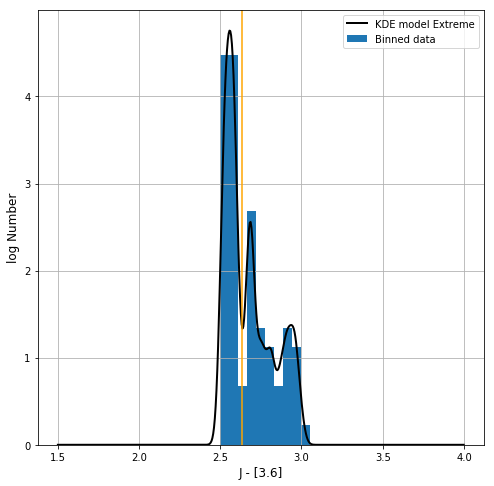

In [79]:
# 79

# Although the data are restricted to a fairly small [3.6]-mag and J-[3.6] range, I think it best
# represents the location of where we expect to see this gap in sources.

kde_data_extreme = extreme_hist.jMINUSthreesix.values
bins=np.arange(min(kde_data_extreme ), max(kde_data_extreme ) + binwidth/1.5, binwidth/1.5)
x_eval_extreme = np.linspace(kde_data_extreme.min() - 1.0, kde_data_extreme.max() + 1.0, 500)
kde_extreme = gaussian_kde(kde_data_extreme,bw_method=binwidth/0.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval_extreme, kde_extreme(x_eval_extreme),'k',lw=2,label='KDE model Extreme')
plt.hist(kde_data_extreme,bins=bins,normed=True,label='Binned data')
#plt.xlim(2.636, 2.638)
#plt.ylim(1.334, 1.336)
plt.legend()
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('log Number', size=12)
plt.axvline(x=2.637, linewidth=1.5, color='orange') # extremely dusty objects boundary
plt.grid(True)
plt.show()
plt.close()
#plt.savefig('[3.6]_vs_J-[3.6]_extreme_KDE.pdf')

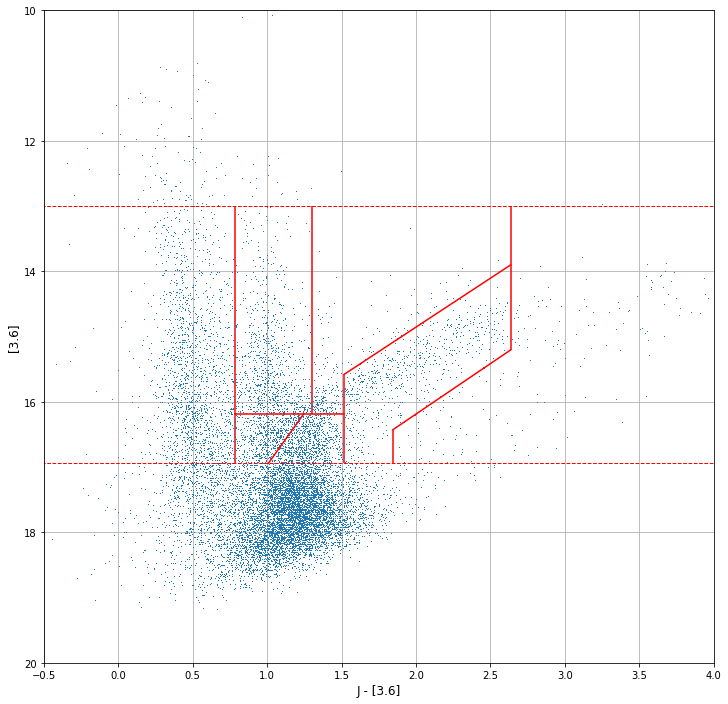

In [80]:
# 80

plt.figure(figsize=(12,12))
plt.plot(jMINUSthreesixDATA.jMINUSthreesix, jMINUSthreesixDATA.k36mag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('[3.6]', size=12)
#plt.axhline(y=16.183, linewidth=1.5, color='lightgreen') # RSG/AGB boundary value determined from KDE below

from numpy.polynomial.polynomial import polyfit

yvalues1 = np.array([16.8715, 16.7325, 16.5935, 16.4545, 16.3155, 16.1765, 16.0375, 15.8985, 15.7595, 15.6205, 15.4815, 15.3425, 15.2035, 15.0645, 14.9255, 14.7865, 14.6475, 14.4390, 14.3000, 14.0915, 13.9525, 13.8135, 13.6745, 13.5355, 13.3965, 13.2575, 13.1185, 12.9795, 12.8405])
yvalues2 = np.array([16.5935, 16.4545, 16.3155, 16.1765, 16.0375])#, 15.8985, 15.7595, 15.6205, 15.4815, 15.3425, 15.2035, 15.0645, 14.9255, 14.7865, 14.6475, 14.4390, 14.3000, 14.0915, 13.9525, 13.8135, 13.6745, 13.5355, 13.3965, 13.2575])#, 13.1185, 12.9795]
#yvalues3 = np.array([15.8985, 15.7595, 15.6205, 15.4815, 15.3425, 15.2035, 15.0645, 14.9255, 14.7865, 14.6475, 14.4390, 14.3000, 14.0915, 13.9525])#, 13.8135, 13.6745, 13.5355, 13.3965, 13.2575]
yvalues3 = np.array([15.3425, 15.2035, 15.0645, 14.9255, 14.7865, 14.6475, 14.4390, 14.3000, 14.0915]) #, 13.9525 16.8715, 16.7325, 16.5935, 16.4545, 16.3155, 16.1765, 16.0375, 15.8985, 15.7595, 15.6205, 15.4815, 
yvalues4 = np.array([16.0375, 15.8985, 15.7595, 15.6205, 15.4815, 15.3425, 15.2035, 15.0645, 14.9255, 14.7865, 14.6475, 14.4390, 14.3000, 14.0915, 13.9525, 13.8135])#, 13.6745], 16.8715, 16.7325, 16.5935, 16.4545, 16.3155, 16.1765, 
boundary1 = np.array([0.782, 0.832, 0.789, 0.809, 0.814, 0.860, 0.828, 0.765, 0.739, 0.709, 0.789, 0.754, 0.760, 0.785, 0.780, 0.812, 0.781, 0.785, 0.816, 0.833, 0.815, 0.808, 0.793, 0.769, 0.760, 0.751, 0.757, 0.770, 0.791])
boundary2 = np.array([1.158, 1.133, 1.250, 1.239, 1.243])#, 1.276, 1.349, 1.269, 1.336, 1.290, 1.238, 1.325, 1.227, 1.273, 1.267, 1.211, 1.307, 1.404, 1.379, 1.248, 1.265, 1.233, 1.217, 1.225])#, 1.560, 1.470]
#boundary3 = np.array([1.446, 1.484, 1.413, 1.515, 1.509, 1.451, 1.557, 1.480, 1.692, 1.615, 1.587, 1.576, 1.577, 1.575])#, 1.822, 1.953, 1.655, 1.621, 1.630]
boundary3 = np.array([1.585, 1.792, 1.910, 2.008, 2.121, 2.159, 2.238, 2.289, 2.493]) #, 2.965 1.455, 1.575, 1.594, 1.525, 1.525, 1.515, 1.523, 1.446, 1.484, 1.477,  1.515, 
boundary4 = np.array([1.989, 2.156, 2.228, 2.470, 2.590, 2.646, 2.833, 2.825, 2.639, 2.818, 2.958, 3.252, 3.281, 3.342, 3.346, 3.330])#, 3.708], 1.818, 1.787, 1.920, 1.883, 1.819, 2.343, 
#
#yvalues3test = np.array([16.8715, 16.7325, 16.5935, 16.4545, 16.3155, 16.1765, 16.0375, 15.8985, 15.7595])#, 15.6205, 15.4815, 15.3425, 15.2035])
#boundary3test = np.array([1.455, 1.575, 1.594, 1.525, 1.525, 1.515, 1.523, 1.446, 1.484])#, 1.730, 1.853, 1.979, 2.163])
#
b1, m1 = polyfit(boundary1, yvalues1, 1)
b2, m2 = polyfit(boundary2, yvalues2, 1)
b3, m3 = polyfit(boundary3, yvalues3, 1)
b4, m4 = polyfit(boundary4, yvalues4, 1)
#b3test, m3test = polyfit(boundary3test, yvalues3test, 1)
#

#print m1, b1
#print m2, b2
#print m3, b3
#print m4, b4

#print m3test, b3test

#plt.plot(boundary1, yvalues1, '.')
#plt.plot(boundary2, yvalues2, '.')
#plt.plot(boundary3, yvalues3, '.') # , '.'
#plt.plot(boundary4, yvalues4, '.')

#plt.plot(boundary3test, yvalues3test)

#plt.plot(boundary1, b1 + m1 * boundary1, '-')
#plt.plot(boundary2, b2 + m2 * boundary2, '-')
#plt.plot(boundary3, b3 + m3 * boundary3, '-')
#plt.plot(boundary4, b4 + m4 * boundary4, '-')

#plt.axhline(y=16.941, linewidth=1.5, color='purple') # TRGB threshold

### functions:
# boundary 1: [3.6] = 8.062146452821322 * (J-[3.6]) + 8.524252538047314
# boundary 2: [3.6] = -3.8272383100774814 * (J-[3.6]) + 19.790442065440516
# boundary 3: [3.6] = -5.5993513937123085 * (J-[3.6]) + 23.555019277339948
# boundary 4: [3.6] = -1.6549383893216707 * (J-[3.6]) + 19.619833999195382

TRGB_boundary  = 16.941
RSGAGB_boundary = 16.183
extremely_dusty = 2.637
Boundary1_vert = 0.787
Boundary2_vert = 1.303 # 1.284
Boundary3_vert = 1.518
Boundary4_vert = 1.845

x_TRGB = np.linspace(-1.0, 5.0, 100)
y_TRGB = 0.0*x_TRGB + 16.941

x_bright = np.linspace(-1.0, 5.0, 100)
y_bright = 0.0*x_bright + 13.0

x_RSGAGB = np.linspace(0.787, 1.518, 100) # 1.303, 1.31658
y_RSGAGB = 0.0*x_RSGAGB + 16.183

x_Boundary2 = np.linspace(1.00867, 1.2461, 100)
y_Boundary2 = -3.192424191991447*x_Boundary2 + 20.161094181672897

x_Boundary3 = np.linspace(1.518, 2.637, 100) # 1.31658, 1.88504
#y_Boundary3 = -5.5993513937123085*x_Boundary3 + 23.555019277339948
y_Boundary3 = -1.4997782178261323*x_Boundary3 + 17.854319551164114

#x_Boundary4 = np.linspace(1.61869, 2.637, 100)
x_Boundary4 = np.linspace(1.845, 2.637, 100)
#y_Boundary4 = -1.6549383893216707*x_Boundary4 + 19.619833999195382
y_Boundary4 = -1.545598944346125*x_Boundary4 + 19.278556850569064

plt.vlines(x=Boundary1_vert, ymin=16.941, ymax=13.0, color='red')

plt.vlines(x=Boundary2_vert, ymin=16.183, ymax=13.0, color='red')

plt.vlines(x=Boundary3_vert, ymin=16.941, ymax=15.5777, color='red') # 16.183

plt.vlines(x=Boundary4_vert, ymin=16.941, ymax=16.4269, color='red')

plt.vlines(x=extremely_dusty, ymin=15.2028, ymax=13.0, color='red') # 15.2558

# don't forget to plot the lines here
#
plt.plot(x_TRGB, y_TRGB, '--', linewidth=1.0, color='red')
plt.plot(x_bright, y_bright, '--', linewidth=1.0, color='red')
plt.plot(x_RSGAGB, y_RSGAGB, color='red')
plt.plot(x_Boundary2, y_Boundary2, color='red')
plt.plot(x_Boundary3, y_Boundary3, color='red')
plt.plot(x_Boundary4, y_Boundary4, color='red')

plt.grid(True)
plt.show()
plt.close()
#plt.savefig('[3.6]_vs_J-[3.6]_color-cuts_X-mas.pdf')